This script will generate a heatmap of hypoteses A, B and E.

This is due to the following contrasts:
* hypo a is laminar over static
* hypo b is oscillatory over laminar
* hypo c i osicllatory Pi over laminar Pi
* hypo d is laminar Pi over laminar no Pi
* hypo E is oscillatory Pi over oscillatory no Pi

In [1]:
import os, pandas, numpy, seaborn
import scipy, scipy.stats

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'sans-serif', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(16, 9)})

In [3]:
colors = [(0, "blue"), (0.5-0.125, "white"), (0.5+0.125, "white"), (1, "red")]
bwwr = matplotlib.colors.LinearSegmentedColormap.from_list("bwwr", colors)

# 0. user-defined variables

In [4]:
DEG_called_folder = '/home/adrian/projects/hegoi/results/subsamples/DEG_filtered/'
expression_file = '/home/adrian/projects/hegoi/results/tpm/DESeq2_TPM_values.tsv'
metadata_file = '/home/adrian/projects/hegoi/metadata/hegoi metadata - hypotheses formatted for filter.tsv'

In [5]:
working_hypotheses = ['A', 'B', 'E']

# 1. read data

## 1.1. read DEG names

In [6]:
file_names = os.listdir(DEG_called_folder)
file_names.sort()

working_file_names = []
for file_name in file_names:
    for working_hypothesis in working_hypotheses:
        if working_hypothesis in file_name:
            working_file_names.append(file_name)

# get all DEGs
gene_list = []
for file_name in working_file_names:
    path = DEG_called_folder + file_name
    #print(path)
    df = pandas.read_csv(path)
    print(file_name, df.shape)
    genes = df['ENSEMBL'].to_list()
    for gene in genes:
        gene_list.append(gene)
DEGs = list(set(gene_list))
print('Detected {} DEGs'.format(len(DEGs)))
    

annotateddf_hypothesis_A_down.tsv (302, 9)
annotateddf_hypothesis_A_up.tsv (172, 9)
annotateddf_hypothesis_B_down.tsv (302, 9)
annotateddf_hypothesis_B_up.tsv (194, 9)
annotateddf_hypothesis_E_down.tsv (9, 9)
annotateddf_hypothesis_E_up.tsv (2, 9)
Detected 793 DEGs


## 1.2. read expression

In [7]:
expression = pandas.read_csv(expression_file, sep='\t', index_col=0)
print(expression.shape)
expression.head()

(40320, 26)


Lam153    Lami154      Lami46      Lami94    LamiP109  \
ENSG00000000003  24.240953  20.242011   22.919919   15.438227   18.098457   
ENSG00000000005   0.062960   0.000000    0.000000    0.000000    0.000000   
ENSG00000000419  59.982918  62.984443  120.871295  138.059565  115.707396   
ENSG00000000457   4.680221   3.684855    1.989328    3.244174    4.417648   
ENSG00000000460   1.982690   1.344508    1.422365    1.667403    0.570064   

                  LamiP153    LamiP154    LamiP176    LamiPi46    LamiPi94  \
ENSG00000000003  29.000777   14.784503   11.903633   26.217884   18.455471   
ENSG00000000005   0.000000    0.000000    0.000000    0.000000    0.000000   
ENSG00000000419  84.892000  172.643218  147.901176  145.183145  135.750959   
ENSG00000000457   2.189278    6.217483    3.998143    4.786793    2.949599   
ENSG00000000460   2.856698    0.416009    0.000000    1.310974    1.812507   

                 ...   OsciP154    OsciP175   OsciP178    OsciPi46    Stat109  \
ENSG00000000003  ...  38.756393   15.976121  21.649331   28.426877  29.688663   
ENSG00000000005  ...   0.000000    0.000000   0.000000    0.000000   0.000000   
ENSG00000000419  ...  98.473591  161.024012  86.023654  115.321222  64.464680   
ENSG00000000457  ...   3.012943    1.024624   2.255165    2.967113   1.825466   
ENSG00000000460  ...   5.510741    3.805323   1.489214    0.957885   4.467578   

                   Stat153    Stat154    Stat176     Stat46     Stat94  
ENSG00000000003  29.207002  28.989493  28.832380  34.600089  27.971771  
ENSG00000000005   0.000000   0.000000   0.013958   0.000000   0.139231  
ENSG00000000419  81.686544  84.388415  88.740844  81.992995  97.987628  
ENSG00000000457   2.371161   3.513856   2.617785   2.546863   2.668982  
ENSG00000000460   5.425887   7.680067   4.002537   3.650609   4.056977  

[5 rows x 26 columns]

In [8]:
log2tpmPO = numpy.log2(expression + 1)
log2tpmPO.head()

Lam153   Lami154    Lami46    Lami94  LamiP109  LamiP153  \
ENSG00000000003  4.657694  4.408848  4.580141  4.038983  4.255384  4.906928   
ENSG00000000005  0.088088  0.000000  0.000000  0.000000  0.000000  0.000000   
ENSG00000000419  5.930333  5.999649  6.929215  7.119559  6.866752  6.424452   
ENSG00000000457  2.505947  2.228005  1.579821  2.085484  2.437667  1.673230   
ENSG00000000460  1.576614  1.229285  1.276416  1.415436  0.650823  1.947366   

                 LamiP154  LamiP176  LamiPi46  LamiPi94  ...  OsciP154  \
ENSG00000000003  3.980437  3.689705  4.766483  4.282104  ...  5.313115   
ENSG00000000005  0.000000  0.000000  0.000000  0.000000  ...  0.000000   
ENSG00000000419  7.439982  7.218211  7.191633  7.095407  ...  6.636242   
ENSG00000000457  2.851496  2.321392  2.532764  1.981706  ...  2.004661   
ENSG00000000460  0.501830  0.000000  1.208501  1.491857  ...  2.702822   

                 OsciP175  OsciP178  OsciPi46   Stat109   Stat153   Stat154  \
ENSG00000000003  4.085435  4.501397  4.879063  4.939634  4.916811  4.906385   
ENSG00000000005  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
ENSG00000000419  7.340064  6.443336  6.861971  6.032645  6.369581  6.415968   
ENSG00000000457  1.017654  1.702731  1.988089  1.498489  1.753246  2.174361   
ENSG00000000460  2.264633  1.315690  0.969296  2.450902  2.683896  3.117706   

                  Stat176    Stat46    Stat94  
ENSG00000000003  4.898807  5.153809  4.856576  
ENSG00000000005  0.019998  0.000000  0.188060  
ENSG00000000419  6.487693  6.374918  6.629176  
ENSG00000000457  1.855107  1.826544  1.875380  
ENSG00000000460  2.322660  2.217420  2.338275  

[5 rows x 26 columns]

## 1.3. read metadata

In [9]:
metadata = pandas.read_csv(metadata_file, sep='\t')
metadata.head()

hypothesis  patient  sampleA  sampleB
0  hypothesis_A       46   Stat46   Lami46
1  hypothesis_A      153  Stat153   Lam153
2  hypothesis_A      154  Stat154  Lami154
3  hypothesis_A       94   Stat94   Lami94
4  hypothesis_B       46   Lami46   Osci46

In [10]:
samples = []
for working_hypothesis in working_hypotheses:
    label = 'hypothesis_{}'.format(working_hypothesis)
    
    sub = metadata[metadata['hypothesis'] == label]
    
    samplesA = sub['sampleA'].to_list()
    samplesB = sub['sampleB'].to_list()
    both = samplesA + samplesB
    
    for element in both:
        samples.append(element)
    
working_samples = list(set(samples))

# 2. build the heatmap

In [11]:
print(log2tpmPO.shape)
block = expression.loc[DEGs]
print(block.shape)
block.head()

(40320, 26)
(793, 26)


Lam153    Lami154     Lami46     Lami94    LamiP109  \
ENSG00000164109   2.803132   2.685424   3.787367   7.220731    5.875386   
ENSG00000180573  22.507270  11.196330   8.476971  14.793350   33.874080   
ENSG00000172216  66.250190  54.740220  22.823570  54.986020  148.976800   
ENSG00000087494   7.327410  20.478062   8.463938  18.530832   10.802532   
ENSG00000197122  44.411820  50.881250  21.714390  36.557150   33.390630   

                  LamiP153    LamiP154    LamiP176   LamiPi46   LamiPi94  ...  \
ENSG00000164109   5.716341    0.506955    0.000000   0.659478  10.214720  ...   
ENSG00000180573  13.767710   17.812470   17.752770  16.604330   8.079935  ...   
ENSG00000172216  14.480990  121.503500  136.563200  49.780080  19.279370  ...   
ENSG00000087494   8.440691    3.417247   11.920116   5.232143   9.527427  ...   
ENSG00000197122  32.018390   45.365490   57.867350  33.415030  30.457440  ...   

                  OsciP154    OsciP175   OsciP178   OsciPi46    Stat109  \
ENSG00000164109   8.046181    3.509638   5.227926   5.541702  22.442130   
ENSG00000180573   5.531374   11.258640  12.237270  10.370590   4.808306   
ENSG00000172216  13.545030  136.932800  96.011720  37.877510  10.898530   
ENSG00000087494   1.955844    5.130261   6.681269   1.073357   3.342525   
ENSG00000197122  18.759320   27.392040  38.072210  23.163280  16.606890   

                   Stat153    Stat154    Stat176     Stat46     Stat94  
ENSG00000164109  33.311360  27.068490  16.268170  15.852170  11.369090  
ENSG00000180573   3.724665   3.660597   8.612262   3.226495   5.606924  
ENSG00000172216  17.684890  24.866530  24.445810  13.512010  14.120950  
ENSG00000087494   0.453589   1.621428   2.372552   1.453343   4.126952  
ENSG00000197122  19.902050  27.531220  25.826840  25.836270  15.598000  

[5 rows x 26 columns]

In [12]:
gene_means = numpy.mean(block, axis='columns')
gene_means

ENSG00000164109      8.959828
ENSG00000180573     11.688601
ENSG00000172216     47.467087
ENSG00000087494      5.404099
ENSG00000197122     29.644900
                      ...    
ENSG00000184584    104.412465
ENSG00000143537    274.953567
ENSG00000151967     22.035616
ENSG00000162692      1.697754
ENSG00000179144     26.401246
Length: 793, dtype: float64

In [13]:
zscore_df = scipy.stats.zscore(block, axis=1)
zscore_df.head()

Lam153   Lami154    Lami46    Lami94  LamiP109  LamiP153  \
ENSG00000164109 -0.751709 -0.766080 -0.631537 -0.212337 -0.376598 -0.396017   
ENSG00000180573  1.430368 -0.065085 -0.424619  0.410488  2.933208  0.274885   
ENSG00000172216  0.435548  0.168652 -0.571441  0.174351  2.353837 -0.764891   
ENSG00000087494  0.366355  2.871307  0.582842  2.500396  1.028300  0.578414   
ENSG00000197122  1.395638  2.007072 -0.749522  0.653285  0.354013  0.224321   

                 LamiP154  LamiP176  LamiPi46  LamiPi94  ...  OsciP154  \
ENSG00000164109 -1.032063 -1.093960 -1.013441  0.153217  ... -0.111553   
ENSG00000180573  0.809655  0.801762  0.649923 -0.477112  ... -0.814065   
ENSG00000172216  1.716778  2.065987  0.053634 -0.653625  ... -0.786595   
ENSG00000087494 -0.378458  1.241179 -0.032754  0.785417  ... -0.656828   
ENSG00000197122  1.485771  2.667336  0.356319  0.076794  ... -1.028809   

                 OsciP175  OsciP178  OsciPi46   Stat109   Stat153   Stat154  \
ENSG00000164109 -0.665447 -0.455651 -0.417340  1.646137  2.973227  2.210997   
ENSG00000180573 -0.056846  0.072541 -0.174258 -0.909664 -1.052936 -1.061406   
ENSG00000172216  2.074557  1.125667 -0.222366 -0.847962 -0.690598 -0.524068   
ENSG00000087494 -0.052161  0.243277 -0.824925 -0.392691 -0.942979 -0.720528   
ENSG00000197122 -0.212920  0.796475 -0.612585 -1.232237 -0.920808 -0.199766   

                  Stat176    Stat46    Stat94  
ENSG00000164109  0.892320  0.841528  0.294161  
ENSG00000180573 -0.406732 -1.118800 -0.804077  
ENSG00000172216 -0.533824 -0.787360 -0.773240  
ENSG00000087494 -0.577453 -0.752545 -0.243273  
ENSG00000197122 -0.360849 -0.359958 -1.327589  

[5 rows x 26 columns]

In [14]:
df2p = zscore_df.loc[:, working_samples]
print(df2p.shape)
df2p.head()

(793, 16)


Stat153   Lami154  OsciP154   Osci153   Osci154   Osci109  \
ENSG00000164109  2.973227 -0.766080 -0.111553  0.415126 -0.605137 -0.067403   
ENSG00000180573 -1.052936 -0.065085 -0.814065 -0.109381 -0.381520 -0.559985   
ENSG00000172216 -0.690598  0.168652 -0.786595 -0.773635 -0.777745 -0.431780   
ENSG00000087494 -0.942979  2.871307 -0.656828 -0.922526 -0.759565 -0.550707   
ENSG00000197122 -0.920808  2.007072 -1.028809 -1.206369 -0.733168 -0.104671   

                 OsciP109    Osci46  OsciP153    Lami94    Lami46  OsciPi46  \
ENSG00000164109  0.583872 -0.561253 -0.853061 -0.212337 -0.631537 -0.417340   
ENSG00000180573 -0.765429 -0.595450  2.394535  0.410488 -0.424619 -0.174258   
ENSG00000172216 -0.771215 -0.589228  0.330563  0.174351 -0.571441 -0.222366   
ENSG00000087494 -0.855353 -0.772518 -0.762220  2.500396  0.582842 -0.824925   
ENSG00000197122 -0.840147  0.205343 -0.332968  0.653285 -0.749522 -0.612585   

                  Stat154    Lam153    Stat46    Stat94  
ENSG00000164109  2.210997 -0.751709  0.841528  0.294161  
ENSG00000180573 -1.061406  1.430368 -1.118800 -0.804077  
ENSG00000172216 -0.524068  0.435548 -0.787360 -0.773240  
ENSG00000087494 -0.720528  0.366355 -0.752545 -0.243273  
ENSG00000197122 -0.199766  1.395638 -0.359958 -1.327589

In [15]:
top = numpy.max(numpy.max(df2p, axis=1))
bottom = numpy.min(numpy.min(df2p, axis=1))

print(top, bottom)

4.774319580032997 -2.1690459190502


working with complete and cosine...
working with complete and euclidean...
working with complete and correlation...
working with complete and braycurtis...
working with complete and chebyshev...
working with complete and seuclidean...
working with complete and minkowski...
working with complete and sqeuclidean...
working with single and cosine...
working with single and euclidean...
working with single and correlation...
working with single and braycurtis...
working with single and seuclidean...
working with single and sqeuclidean...
working with average and cosine...
working with average and euclidean...
working with average and correlation...
working with average and braycurtis...
working with average and chebyshev...
working with average and seuclidean...
working with average and minkowski...


/home/adrian/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:805: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = plt.figure(figsize=figsize)


working with average and sqeuclidean...
working with ward and cosine...
working with ward and euclidean...
working with ward and correlation...
working with ward and braycurtis...
working with ward and chebyshev...
working with ward and seuclidean...
working with ward and minkowski...
working with ward and sqeuclidean...
working with weighted and cosine...
working with weighted and euclidean...
working with weighted and correlation...
working with weighted and braycurtis...
working with weighted and chebyshev...
working with weighted and seuclidean...
working with weighted and minkowski...
working with weighted and sqeuclidean...
working with centroid and cosine...
working with centroid and euclidean...
working with centroid and correlation...
working with centroid and braycurtis...
working with centroid and chebyshev...
working with centroid and seuclidean...
working with centroid and minkowski...
working with centroid and sqeuclidean...
working with median and cosine...
working with 

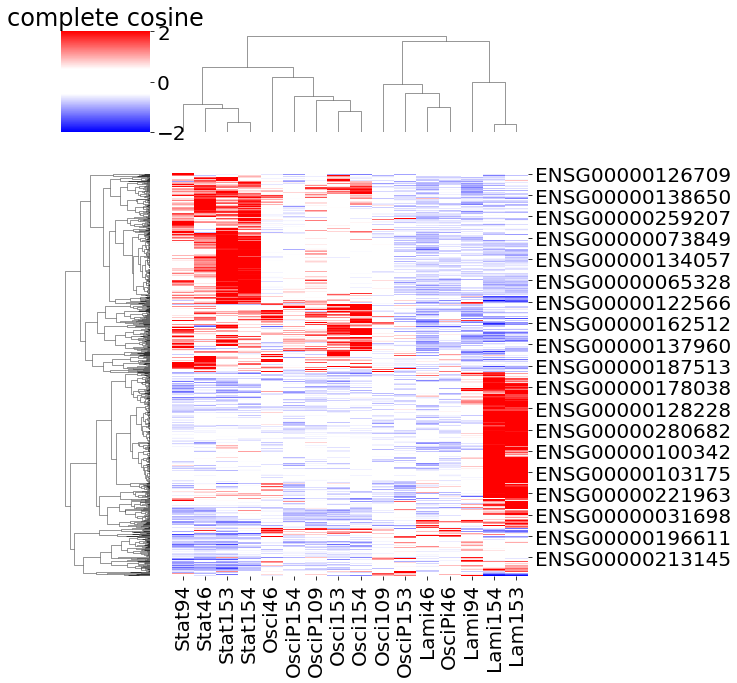

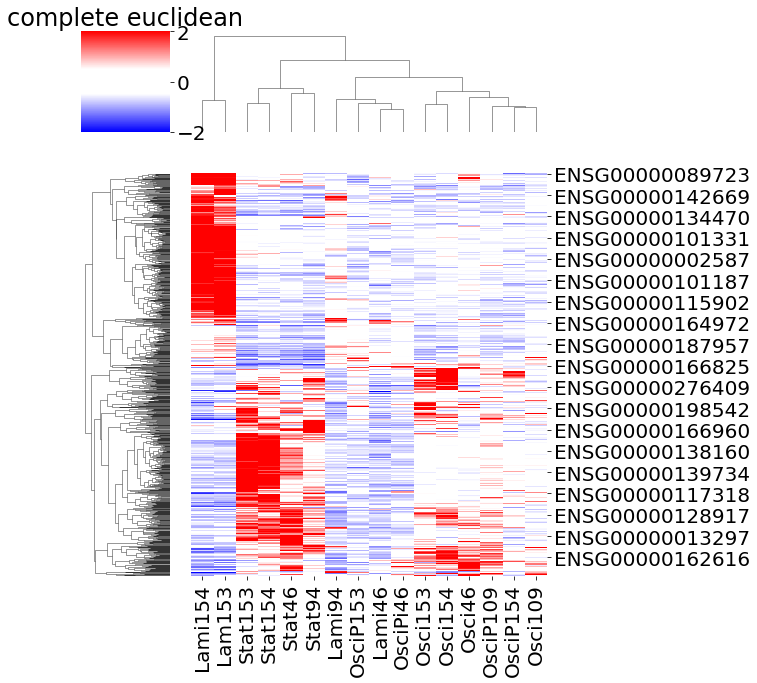

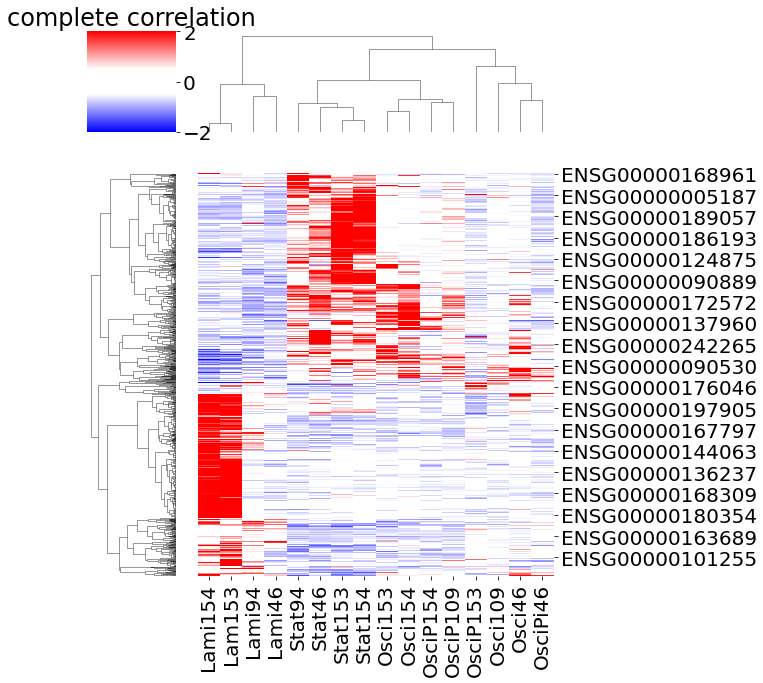

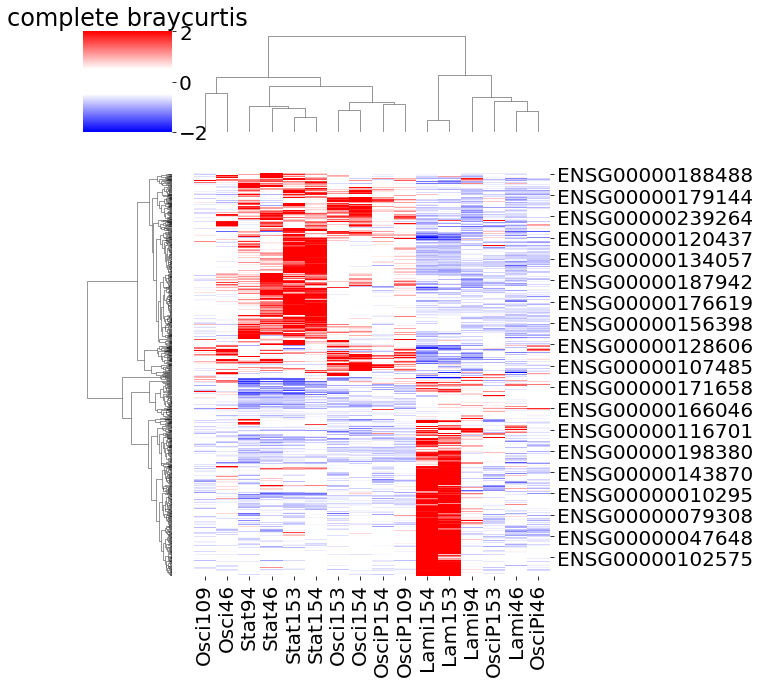

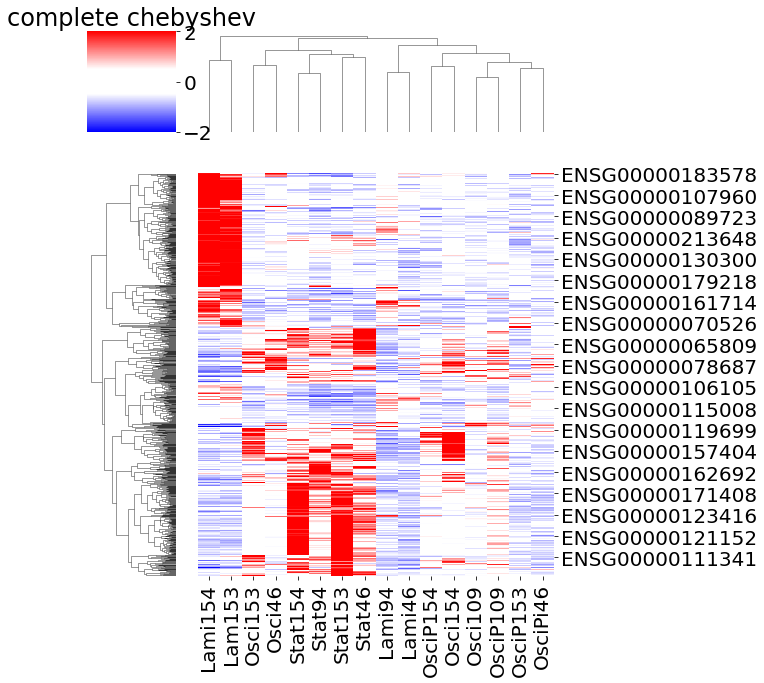

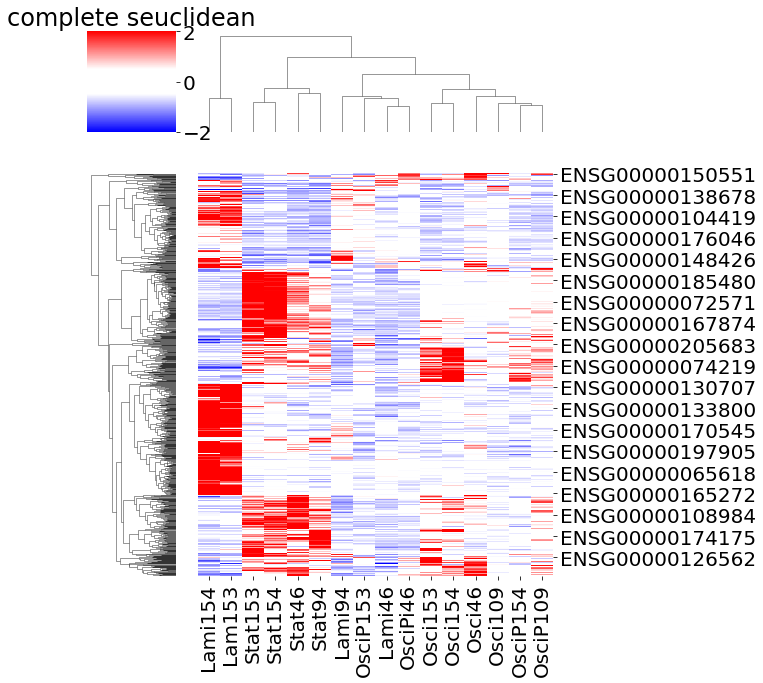

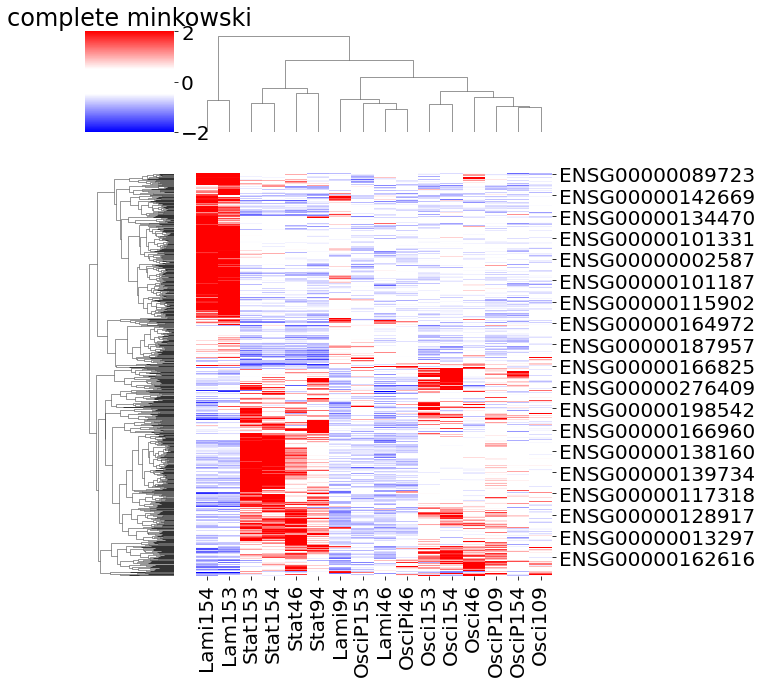

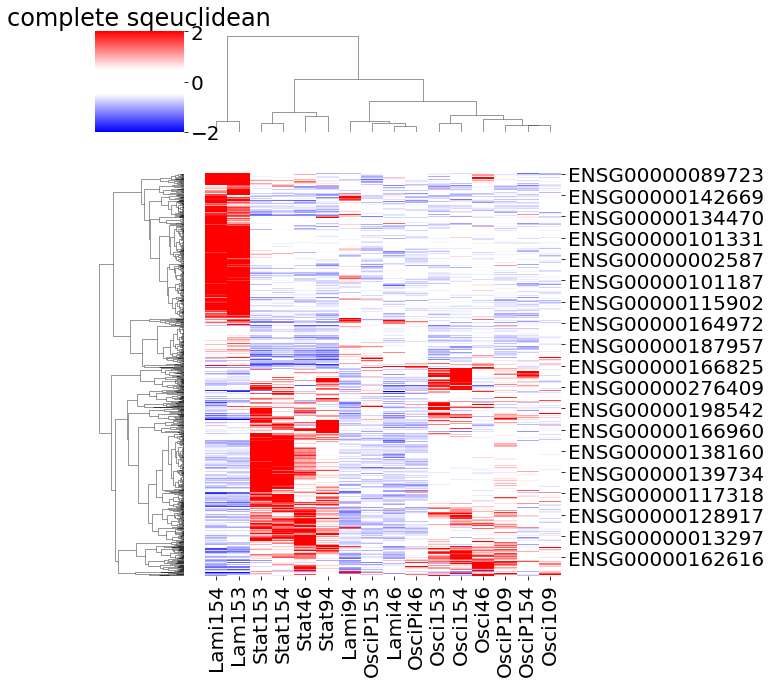

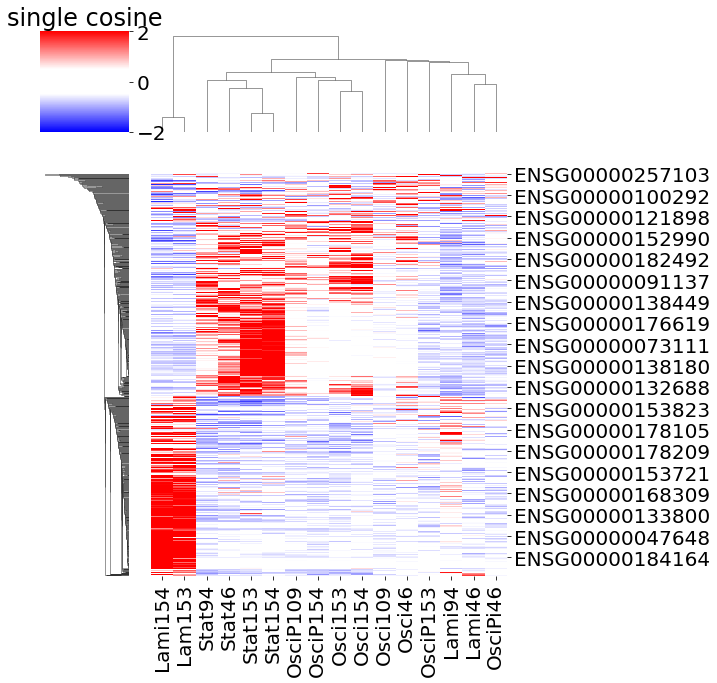

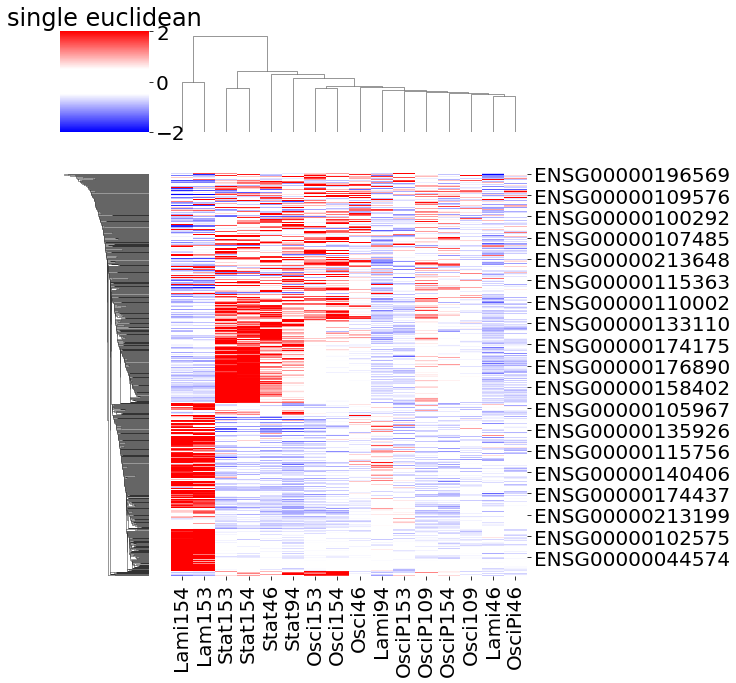

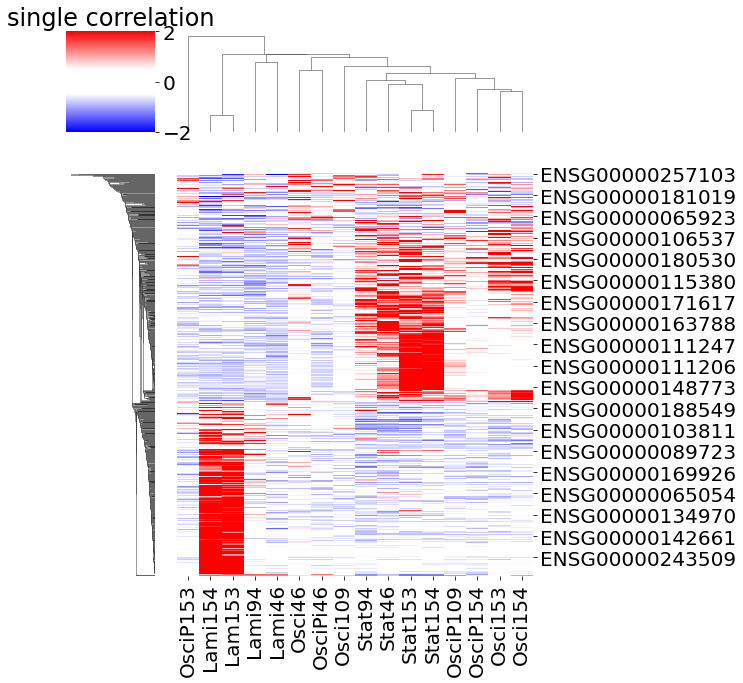

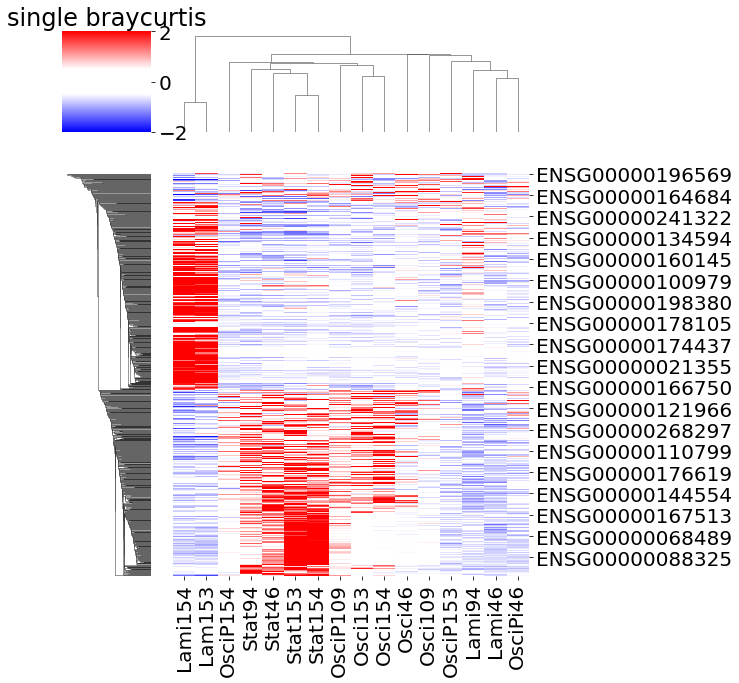

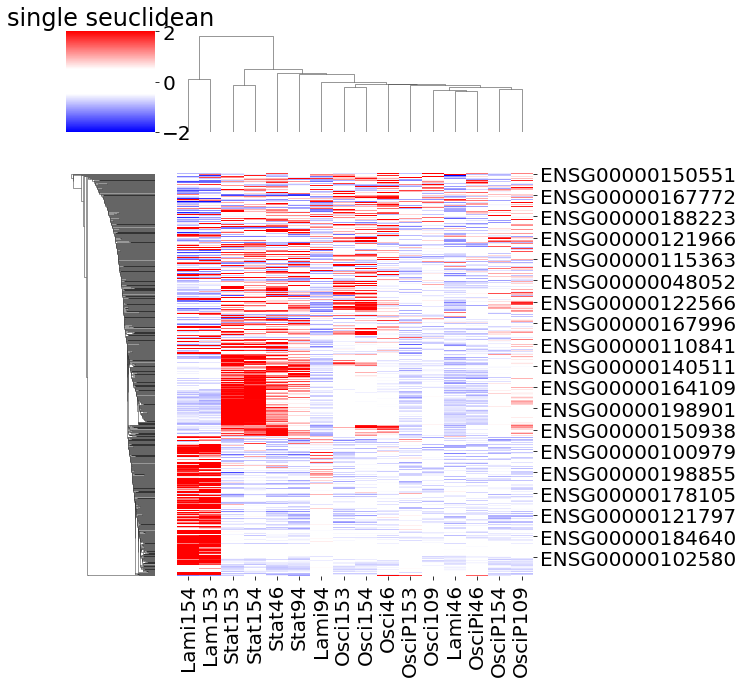

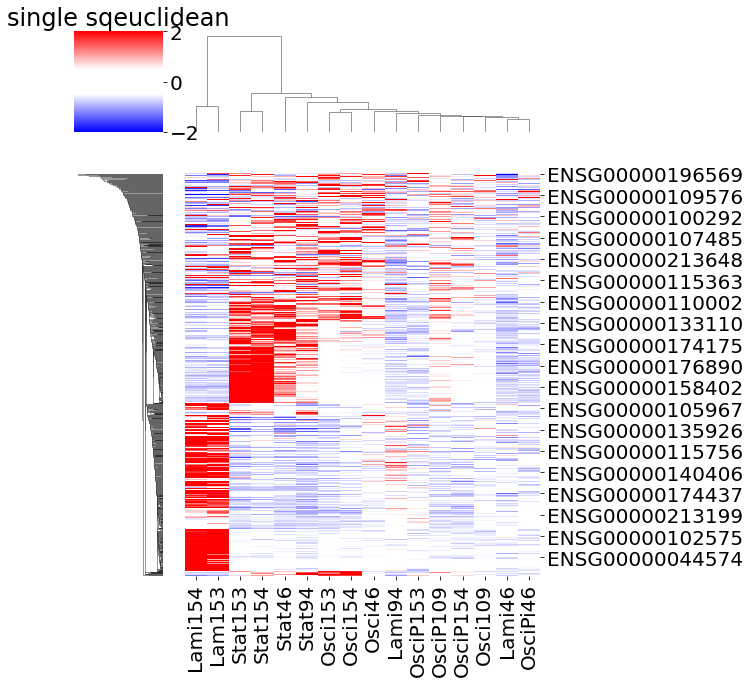

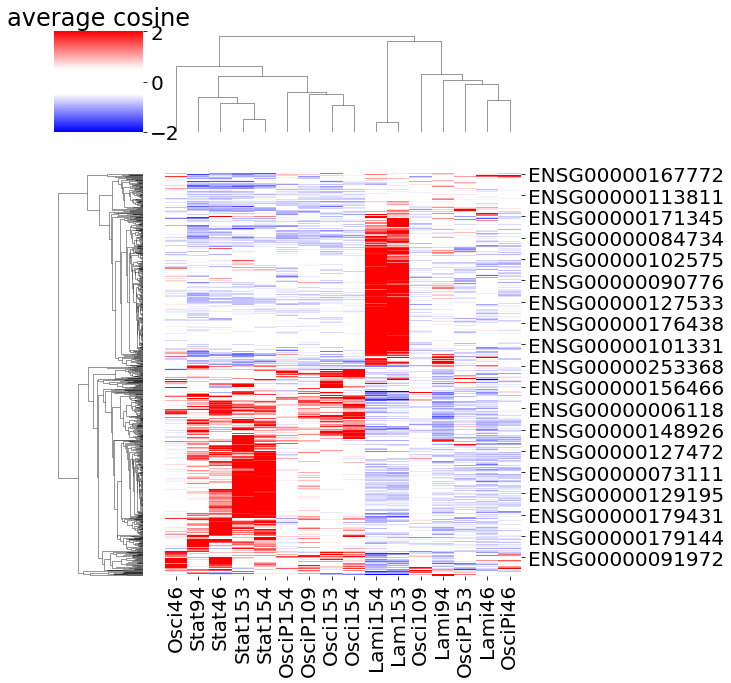

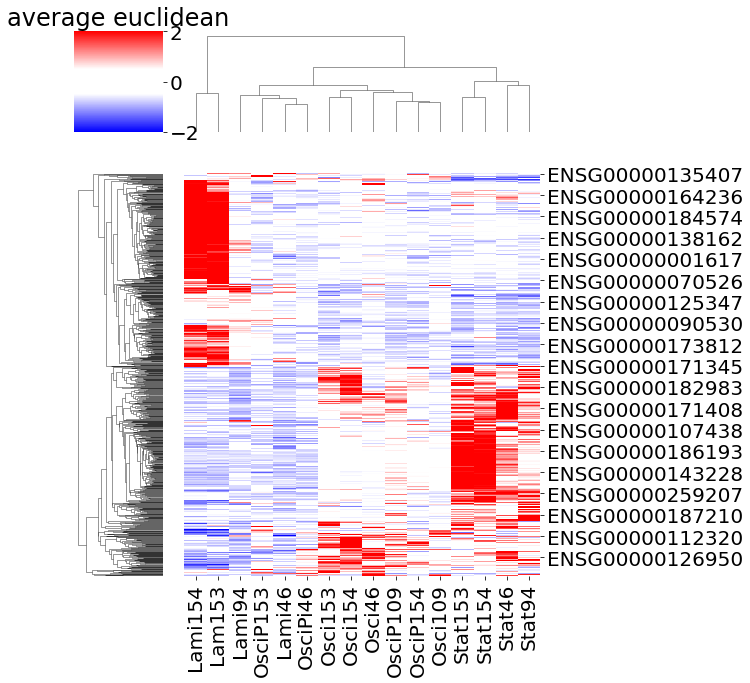

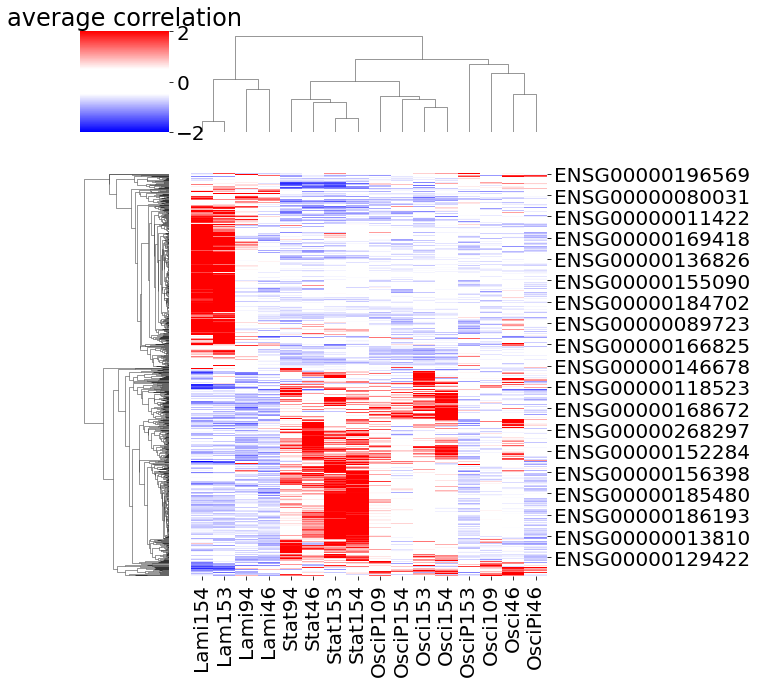

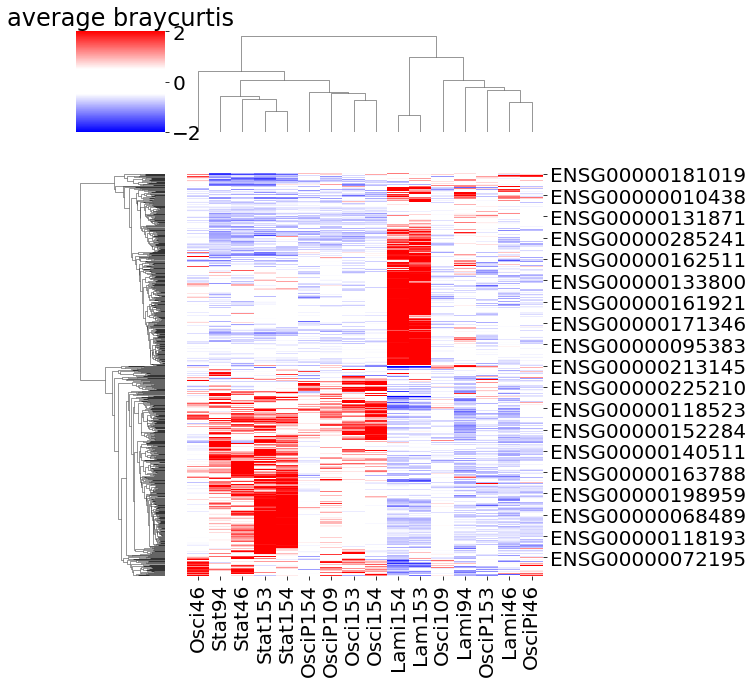

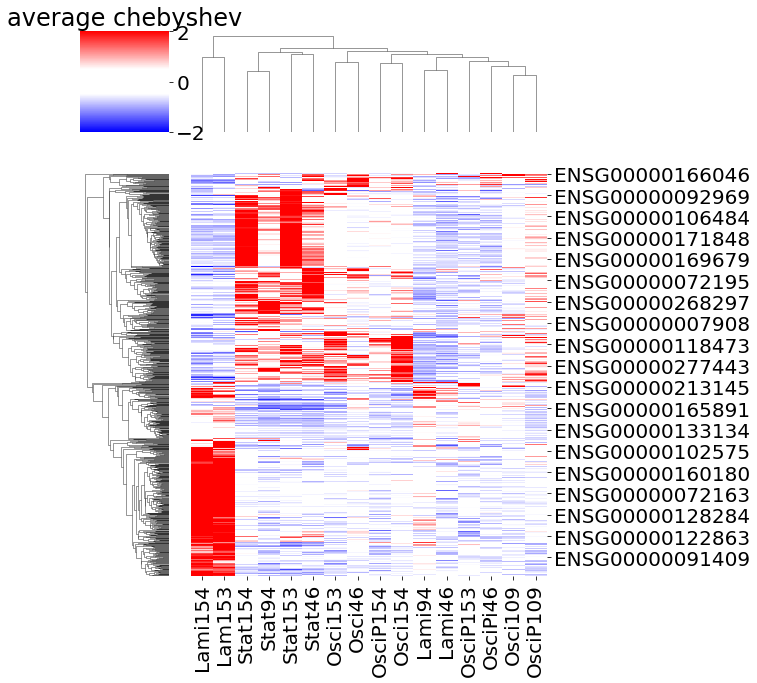

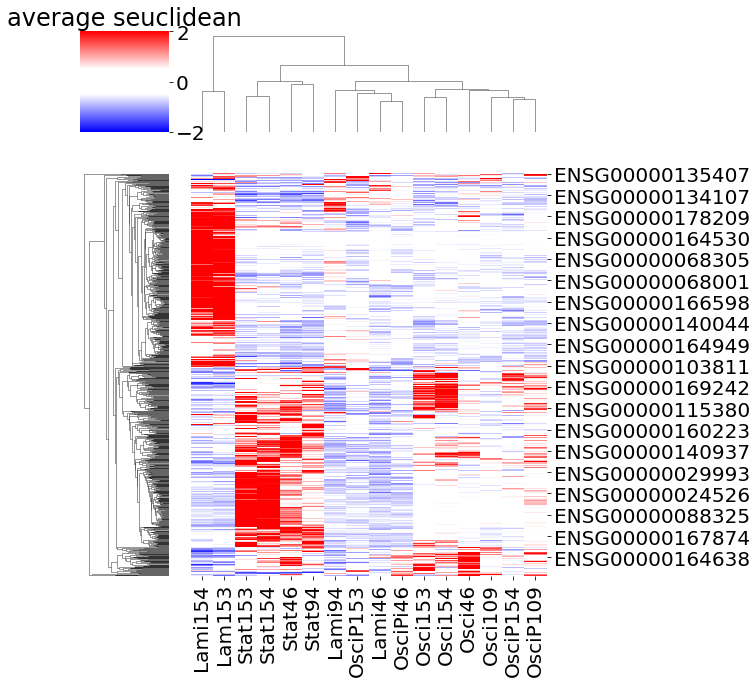

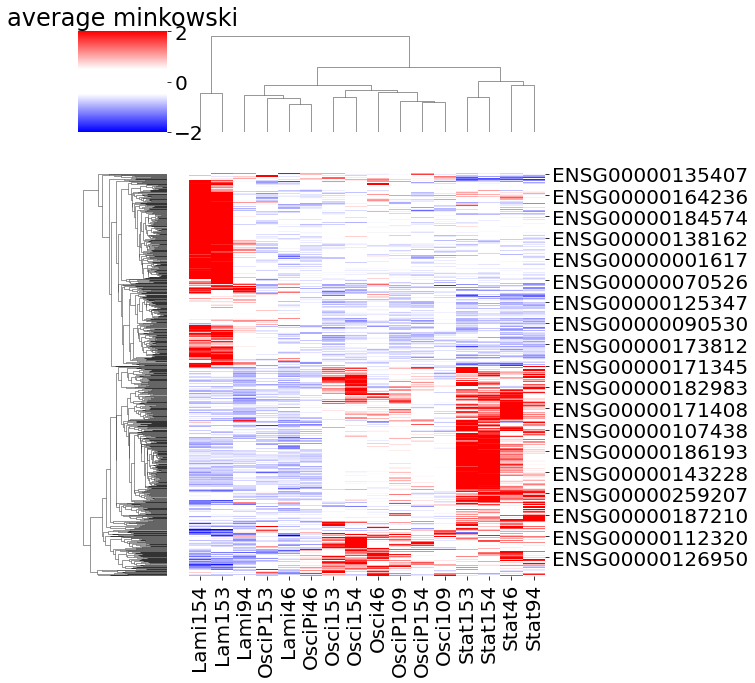

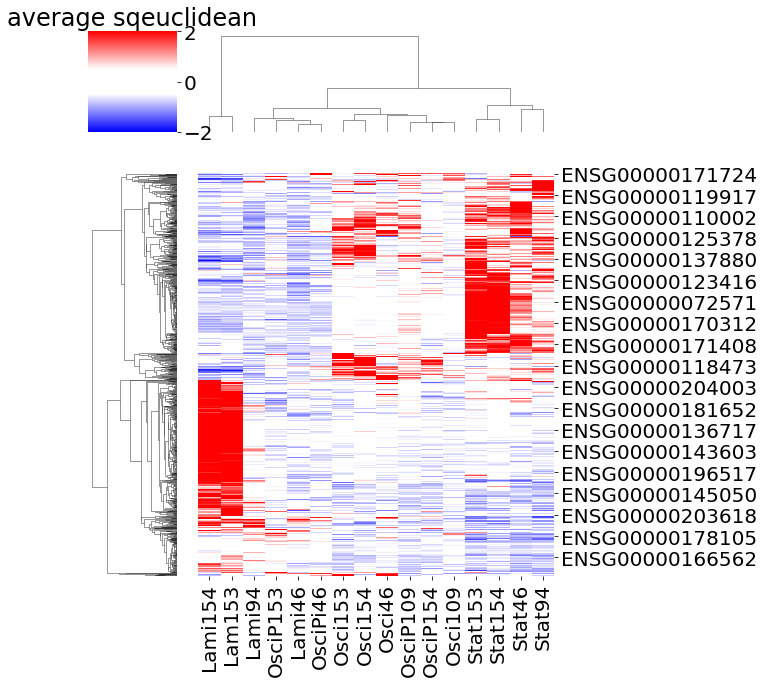

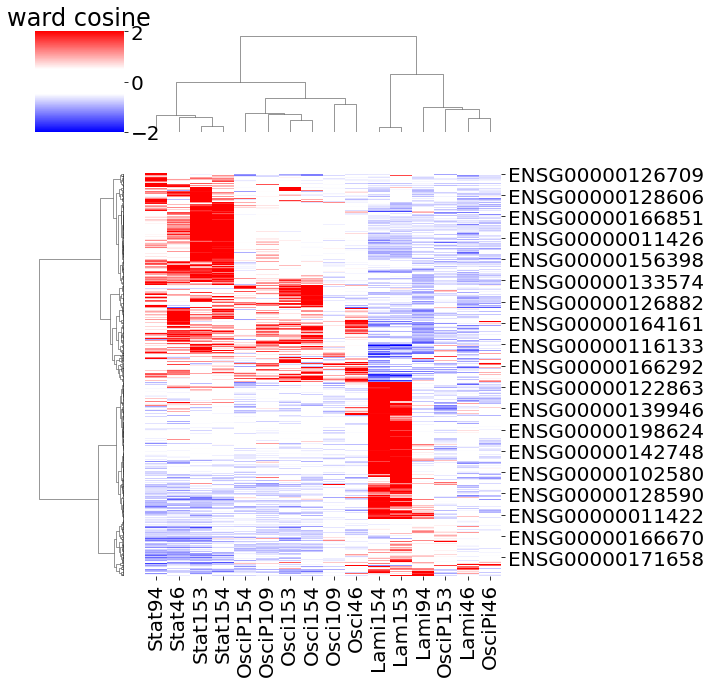

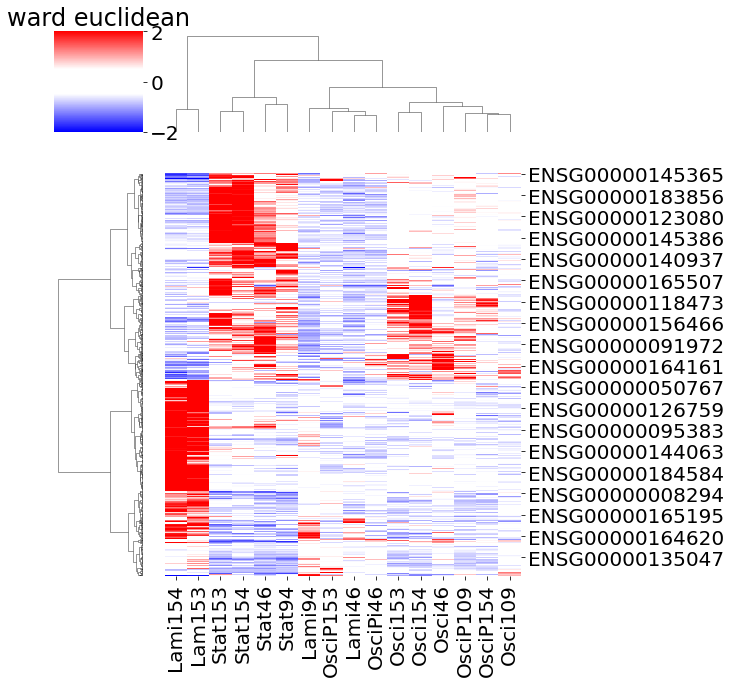

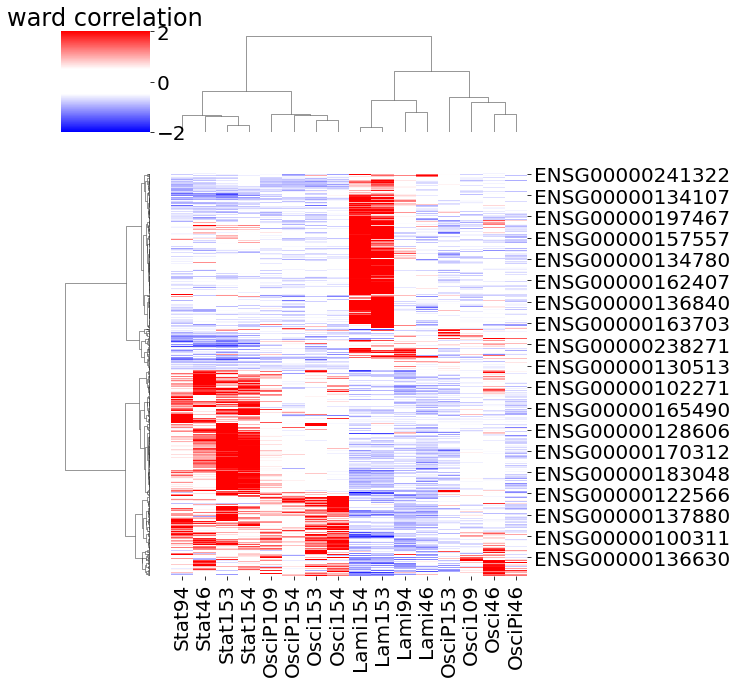

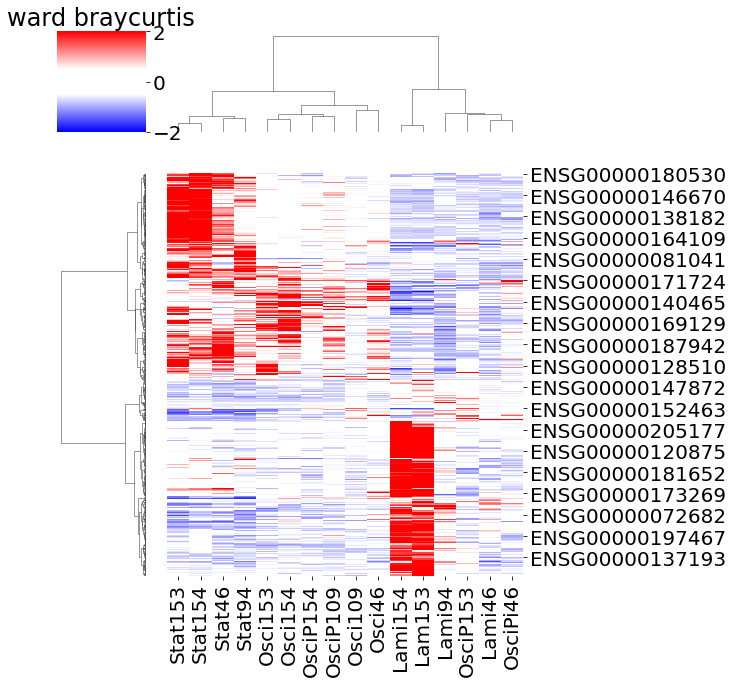

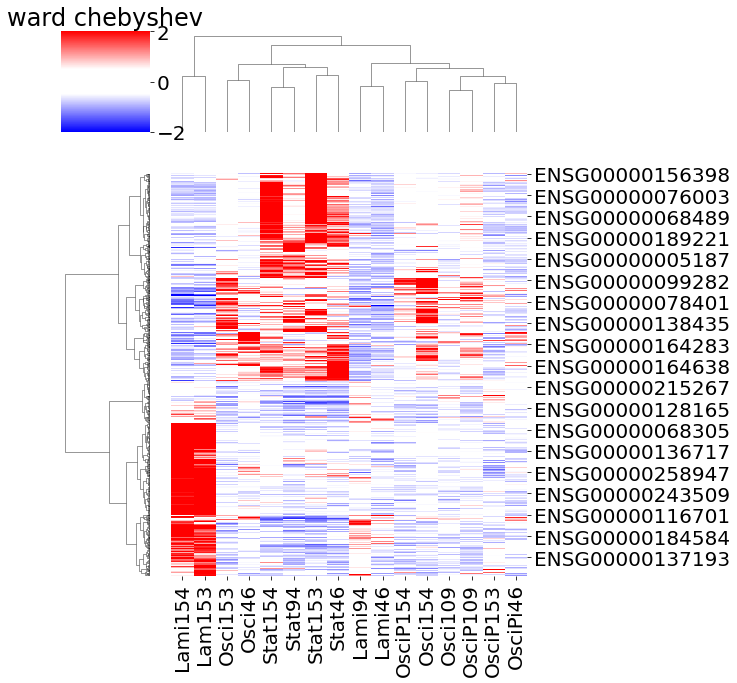

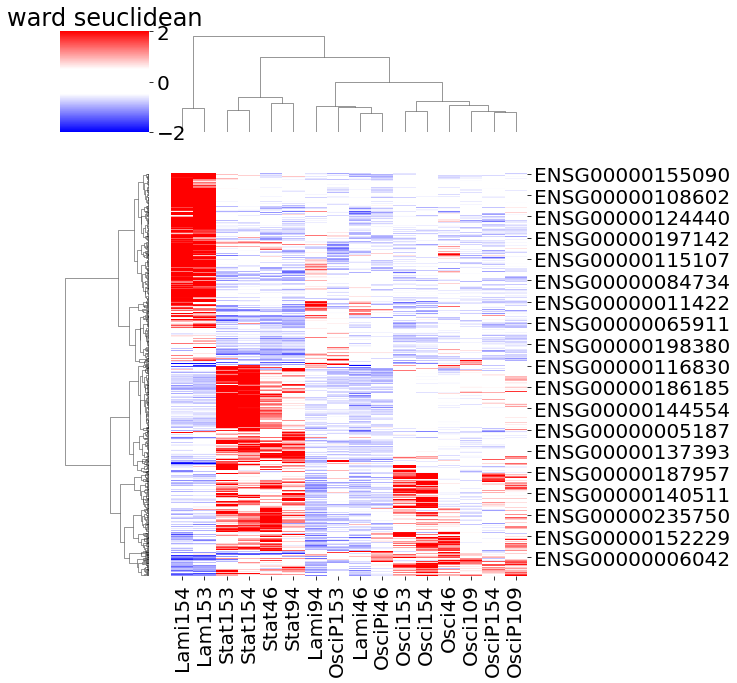

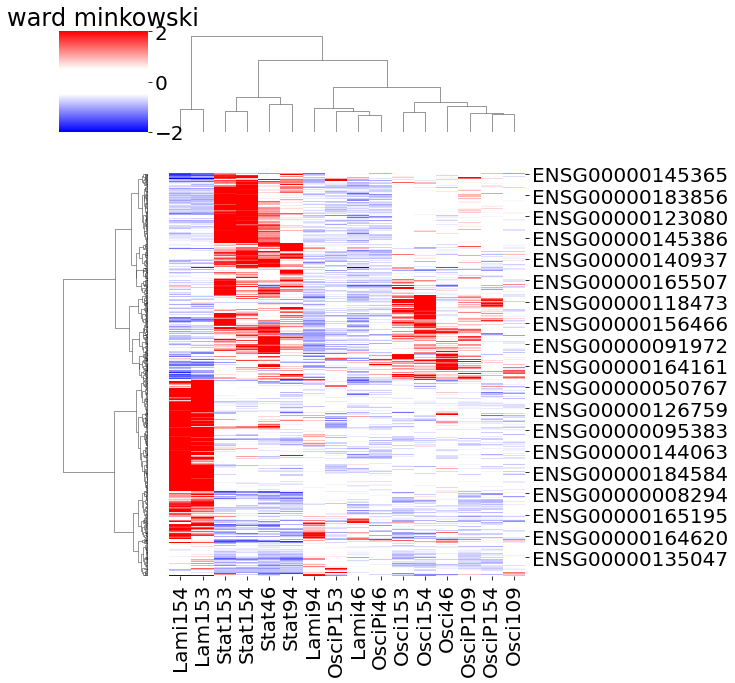

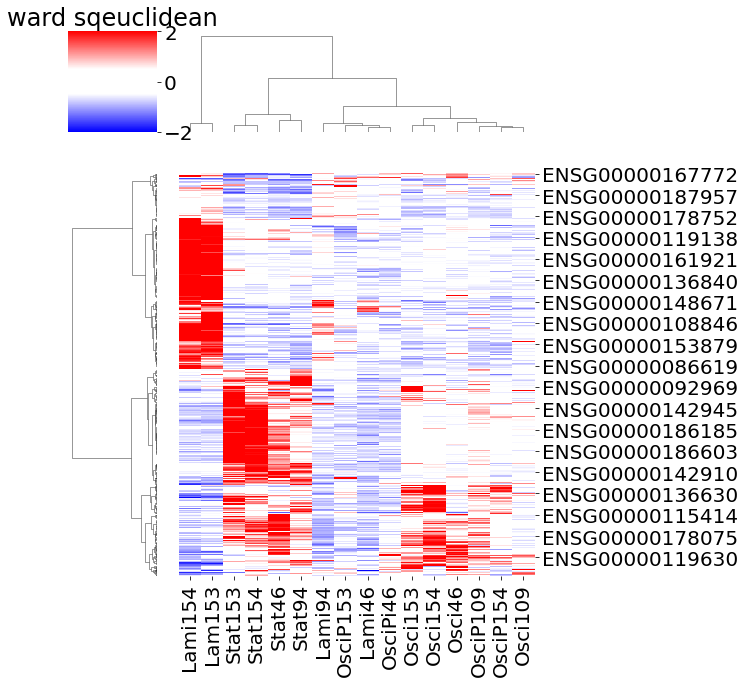

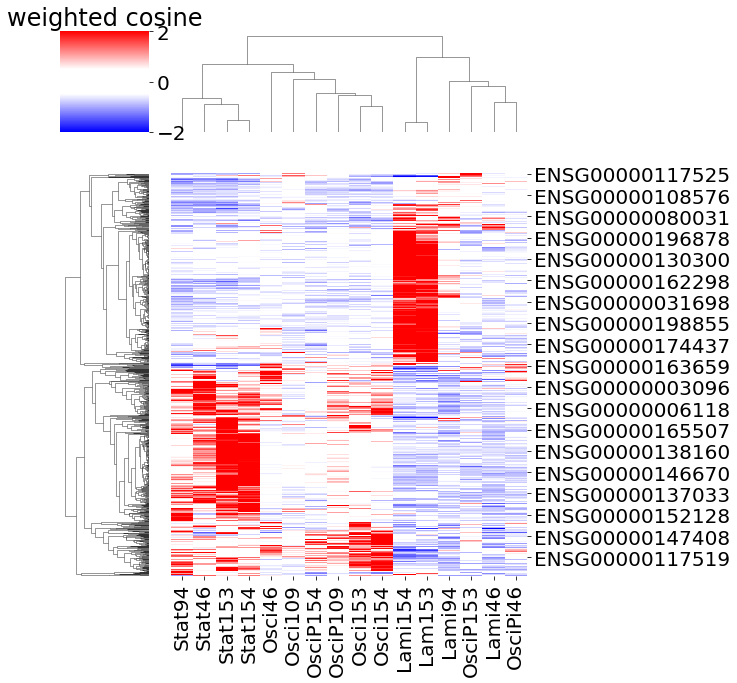

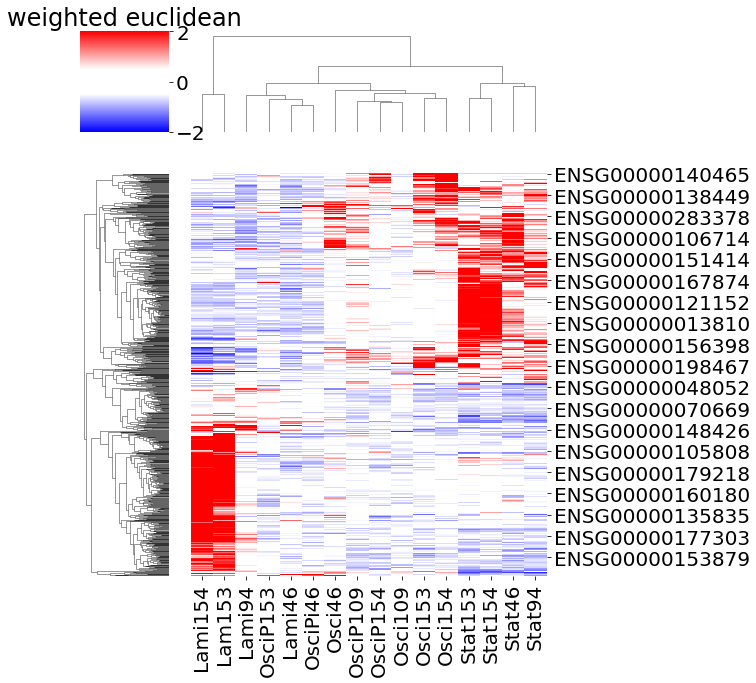

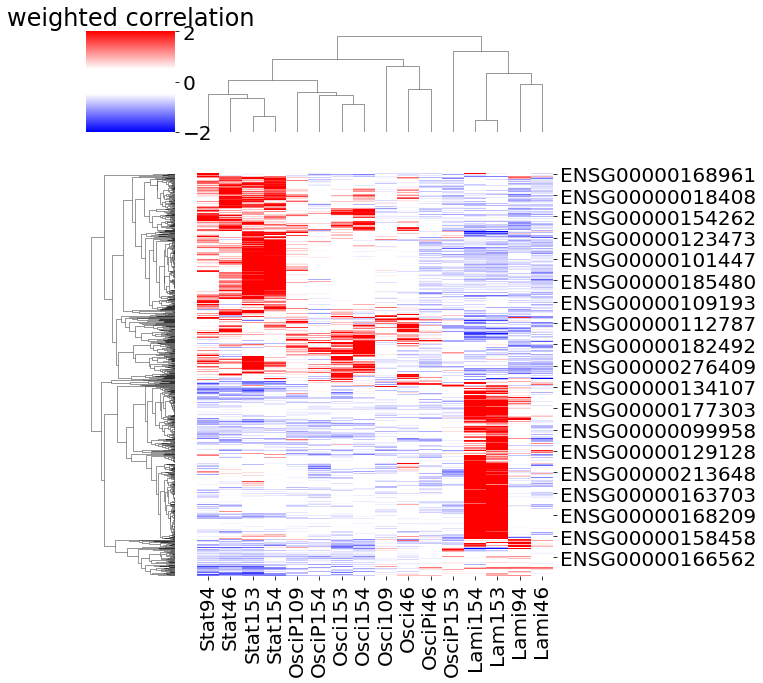

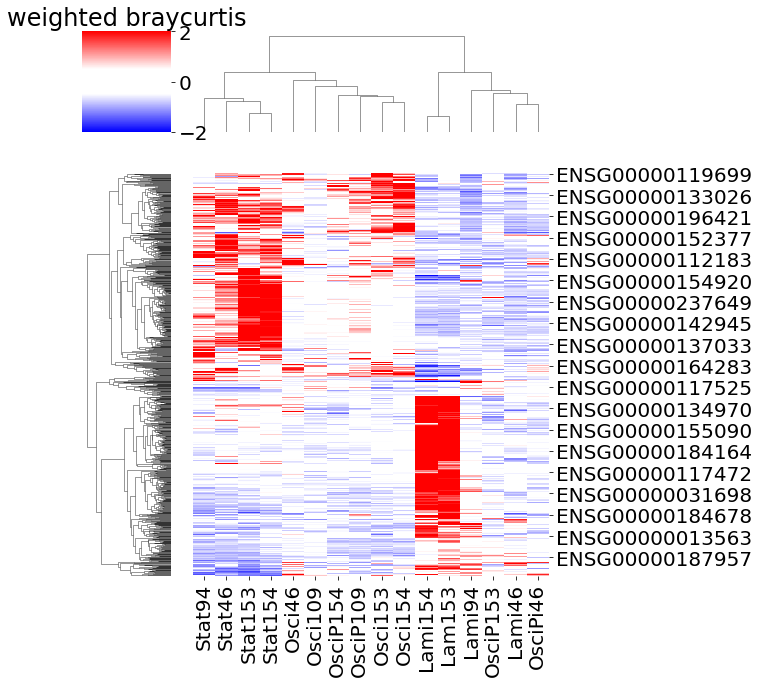

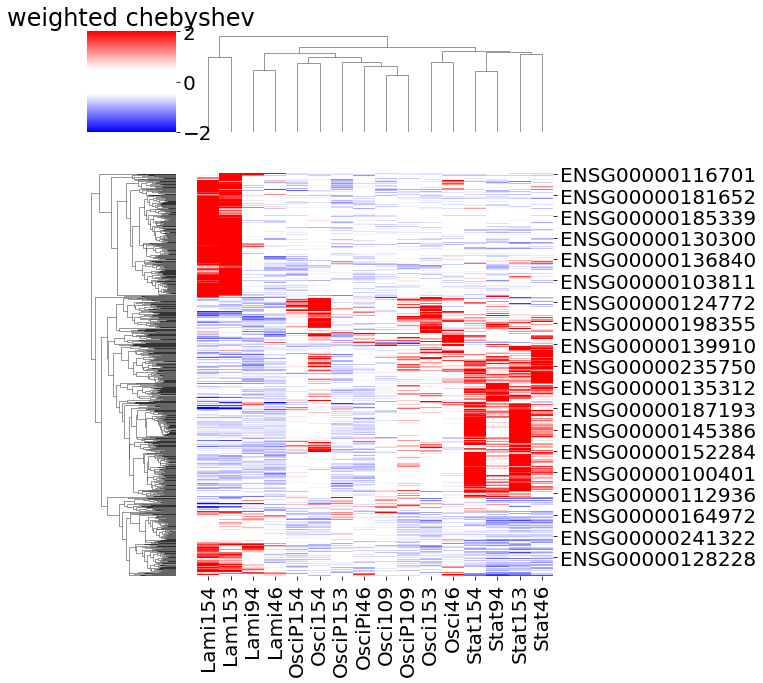

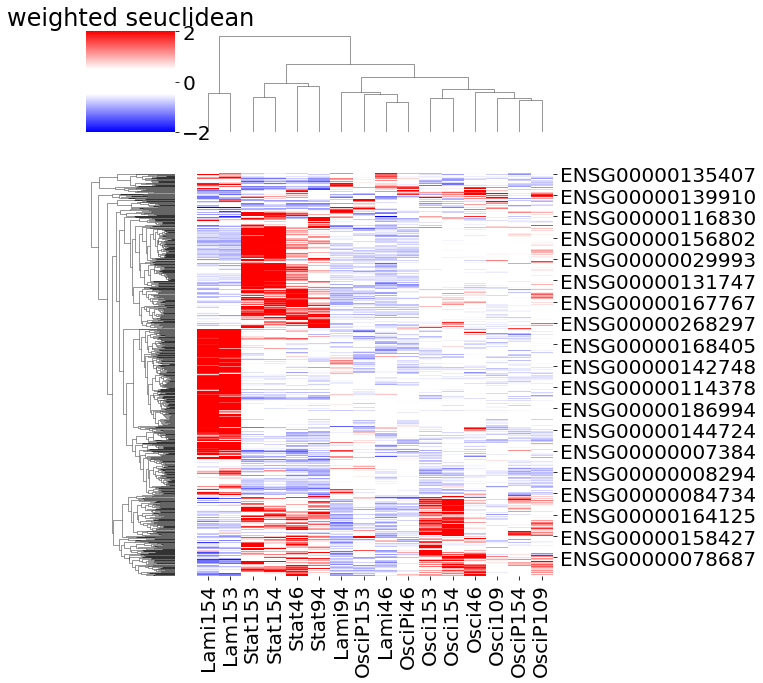

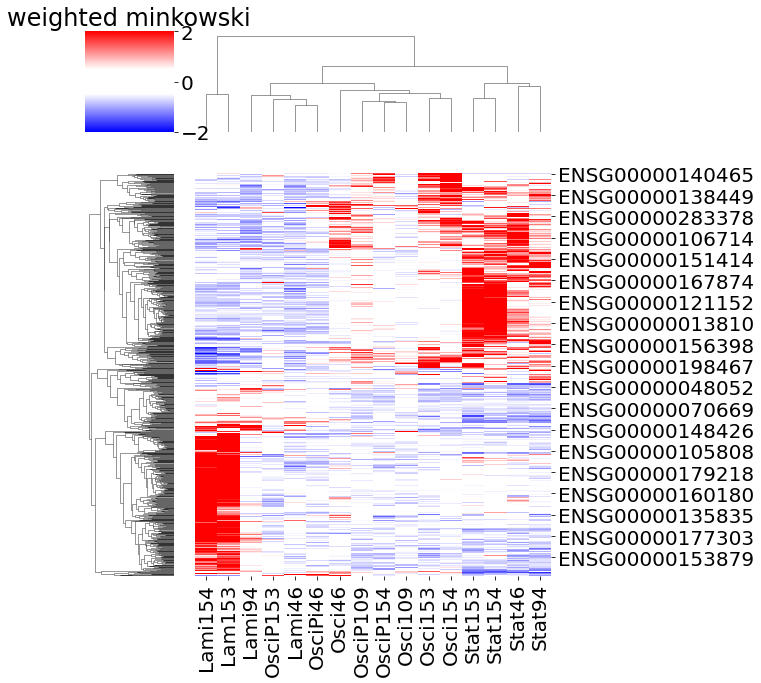

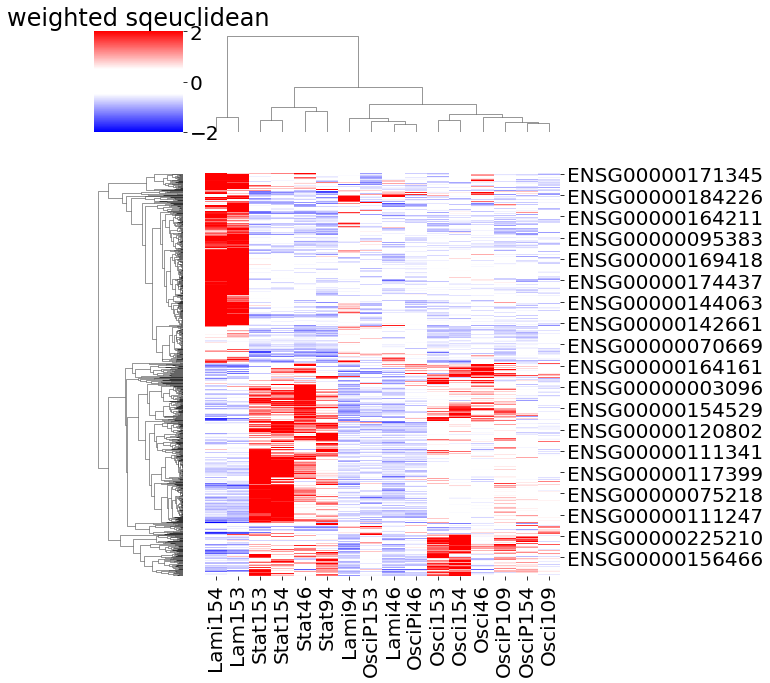

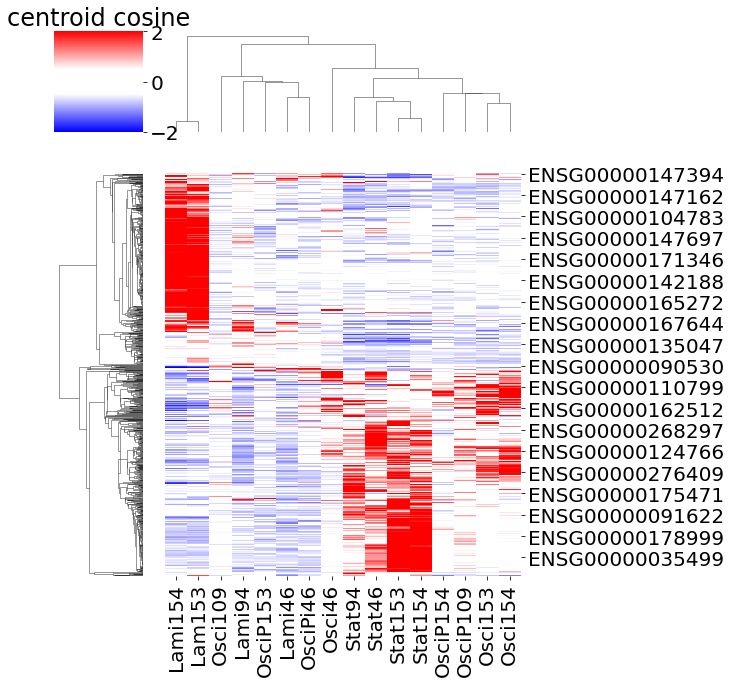

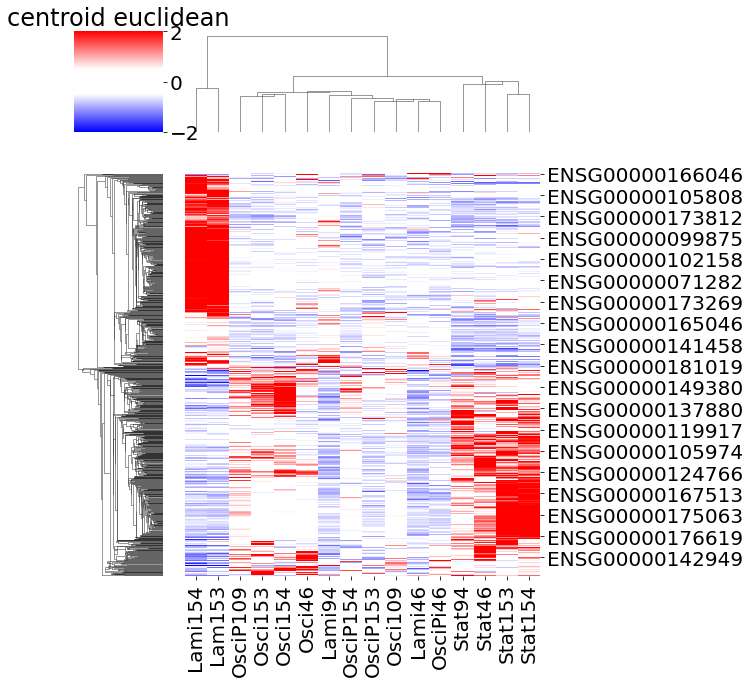

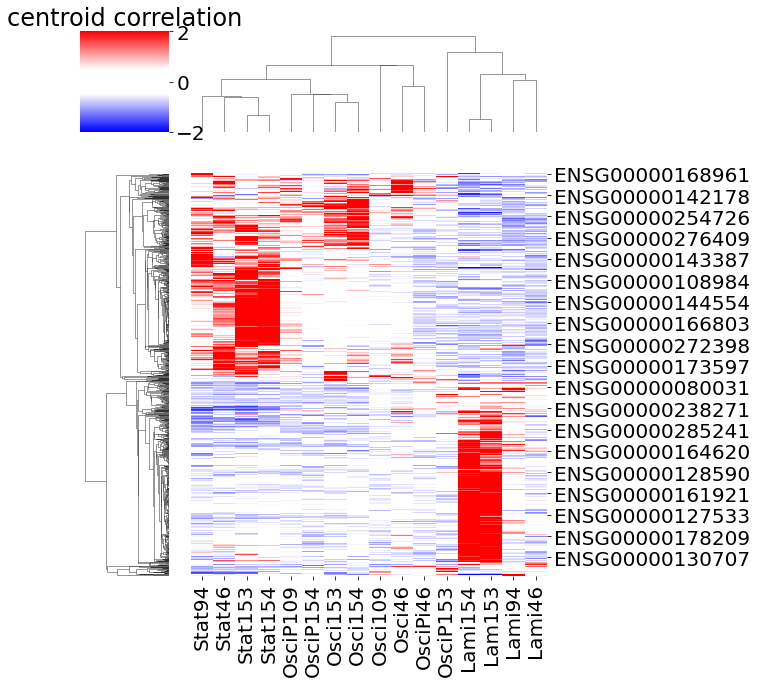

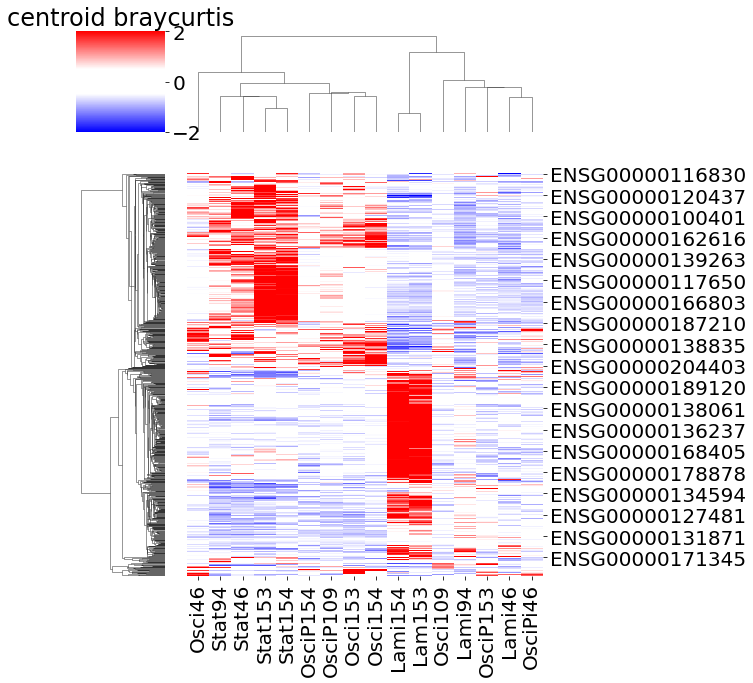

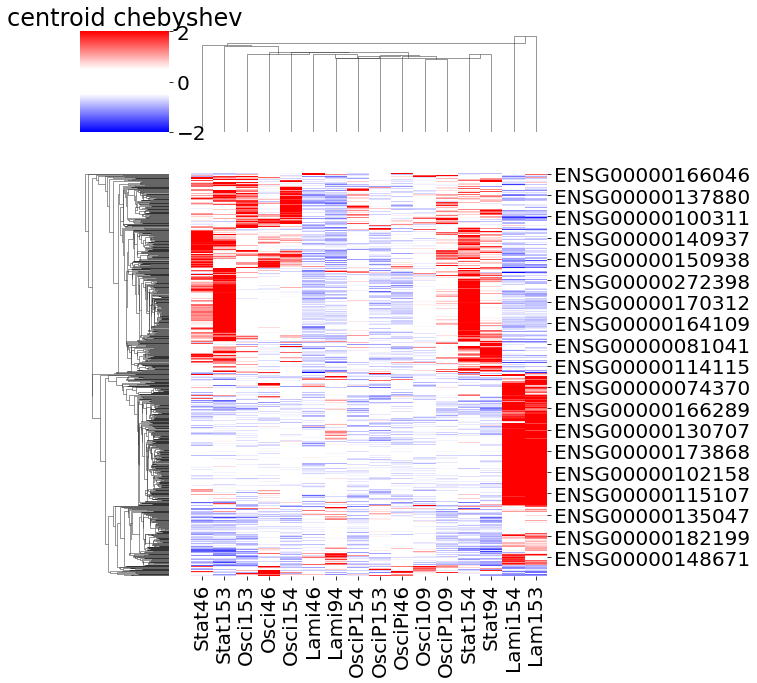

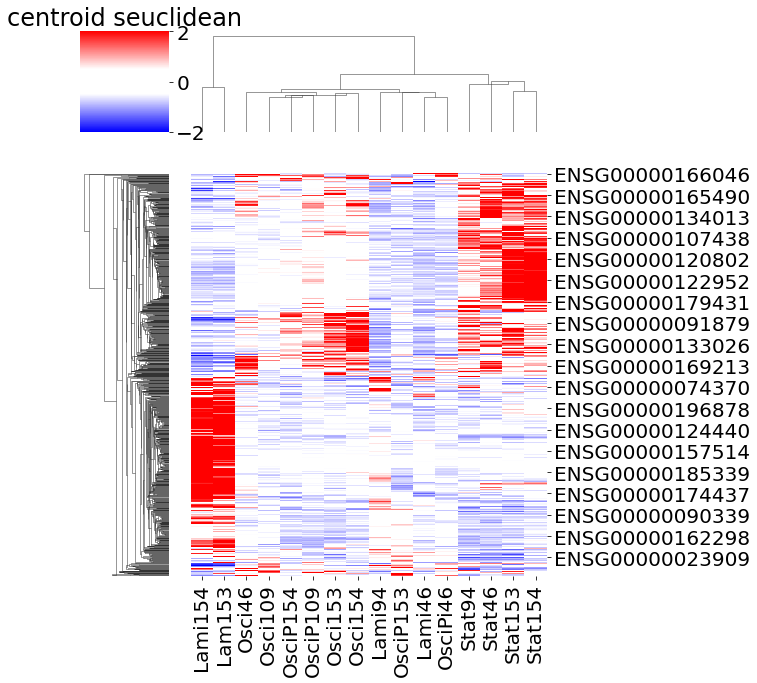

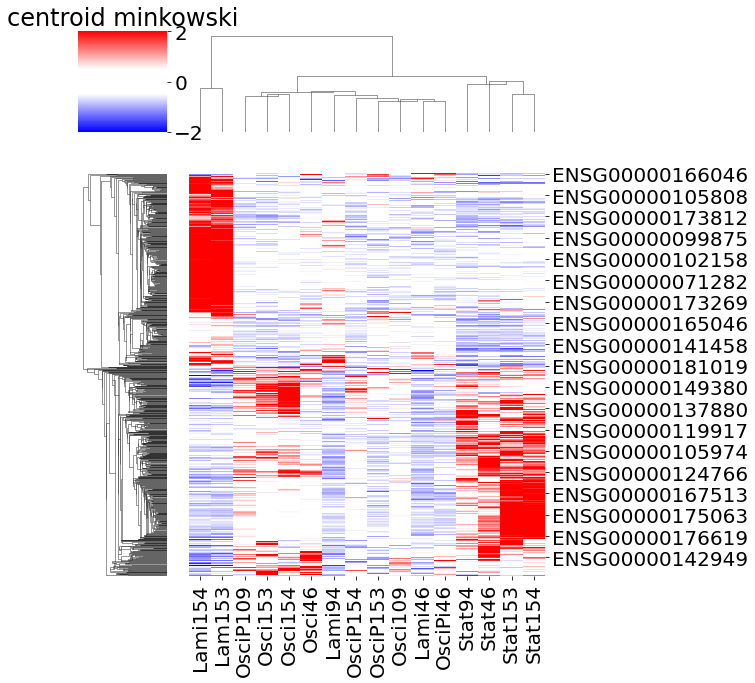

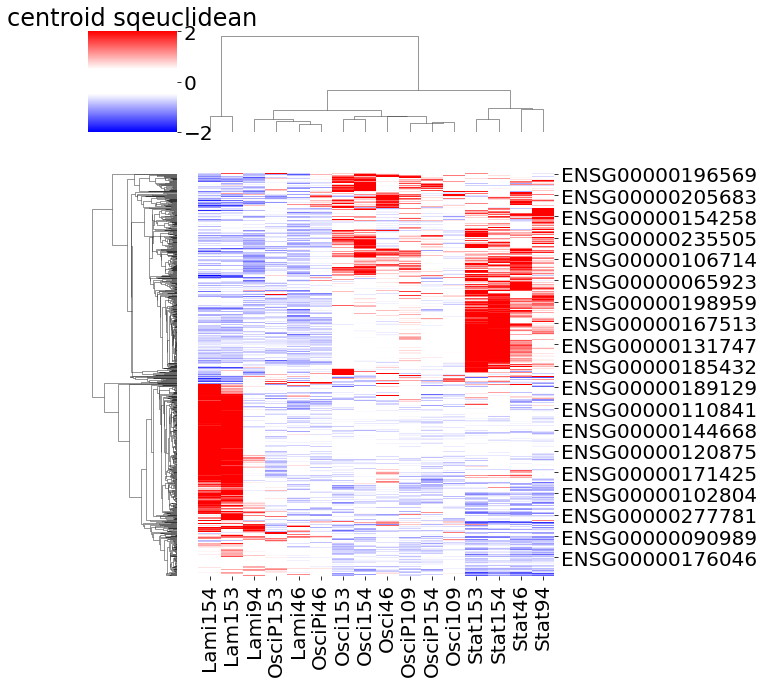

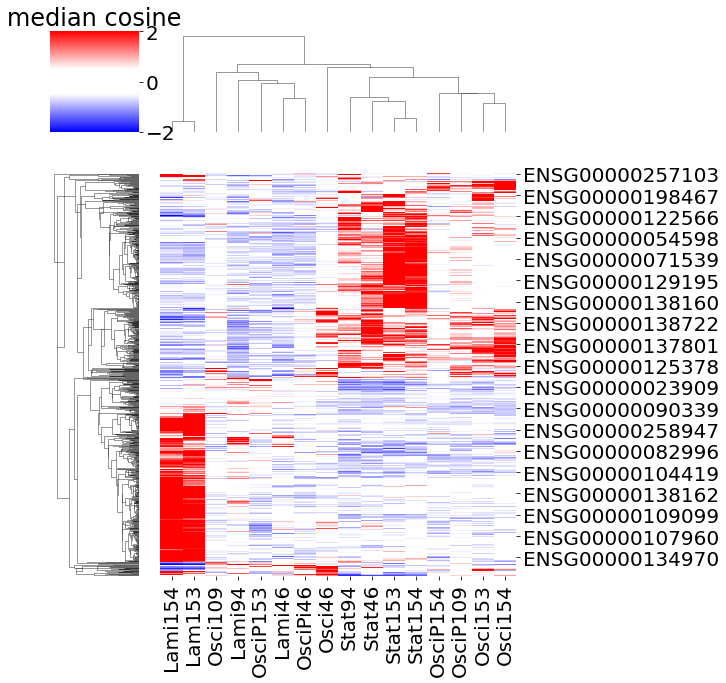

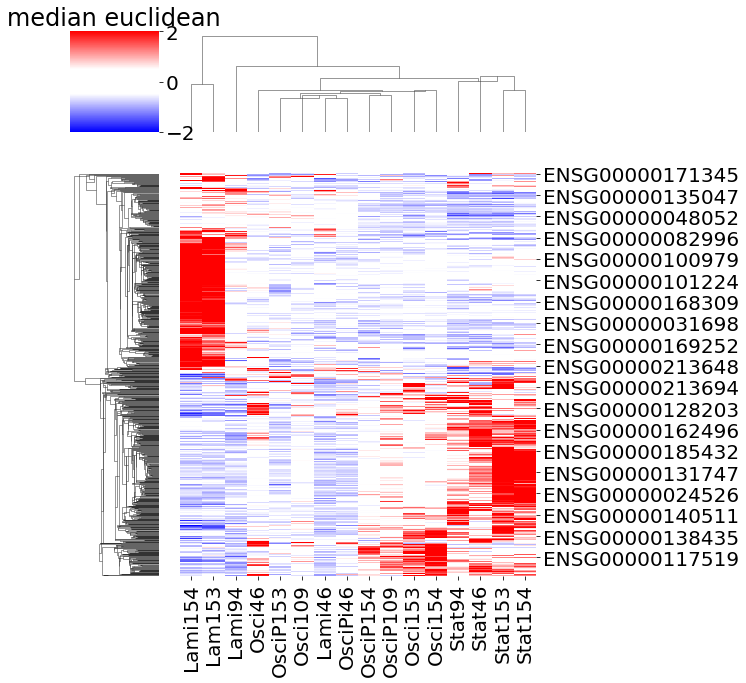

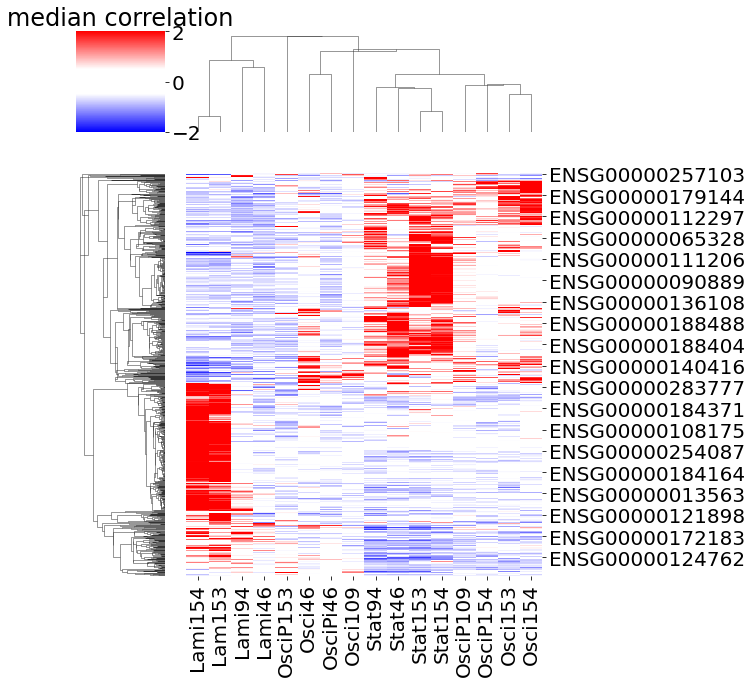

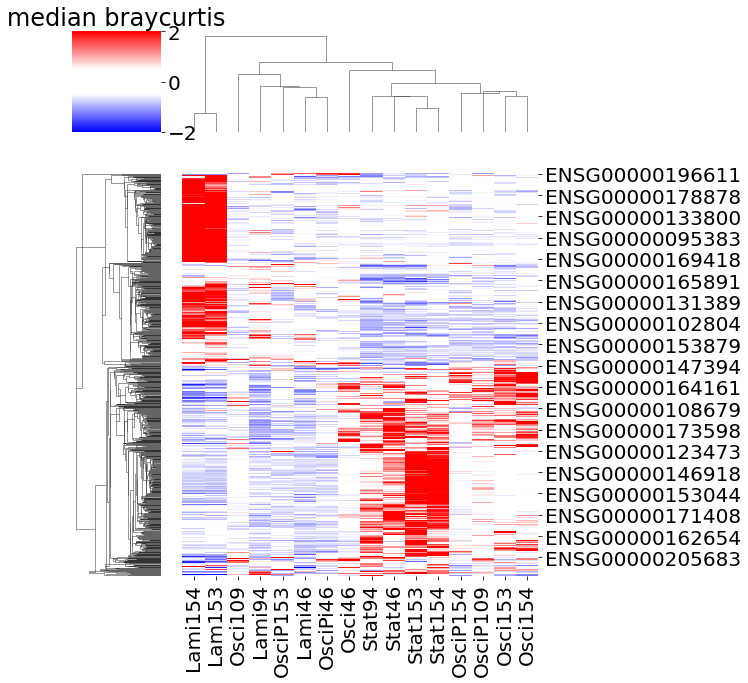

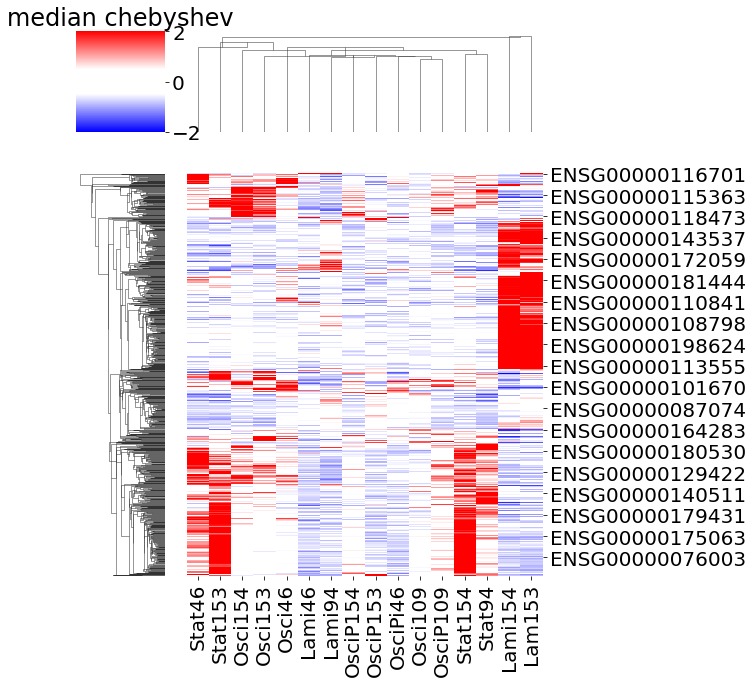

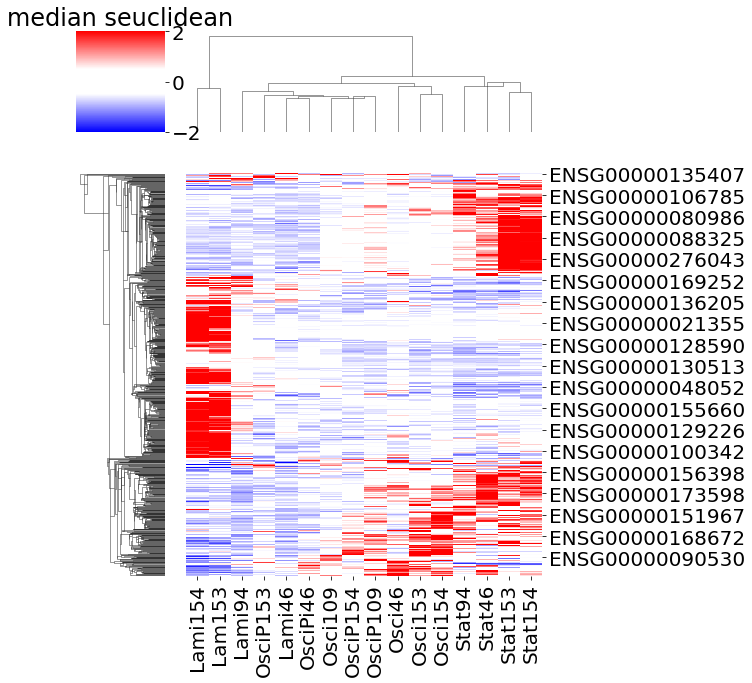

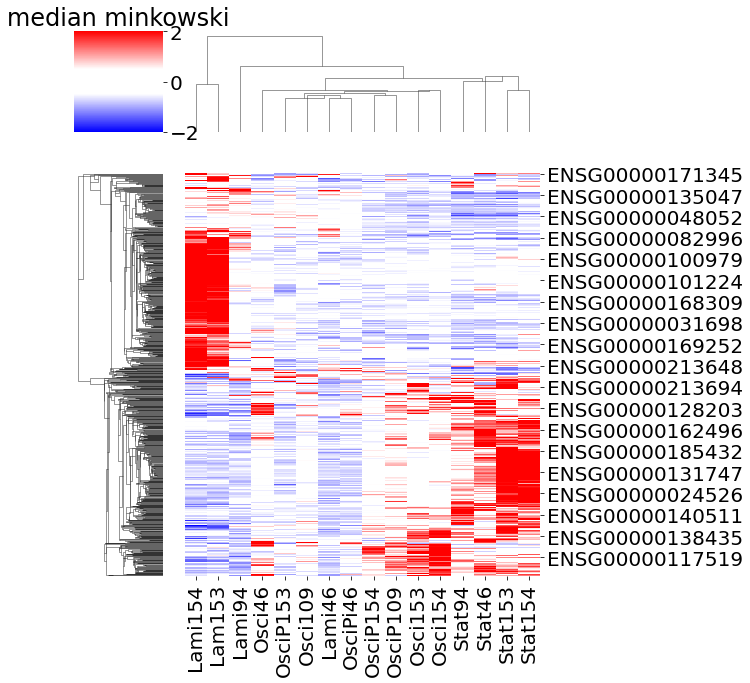

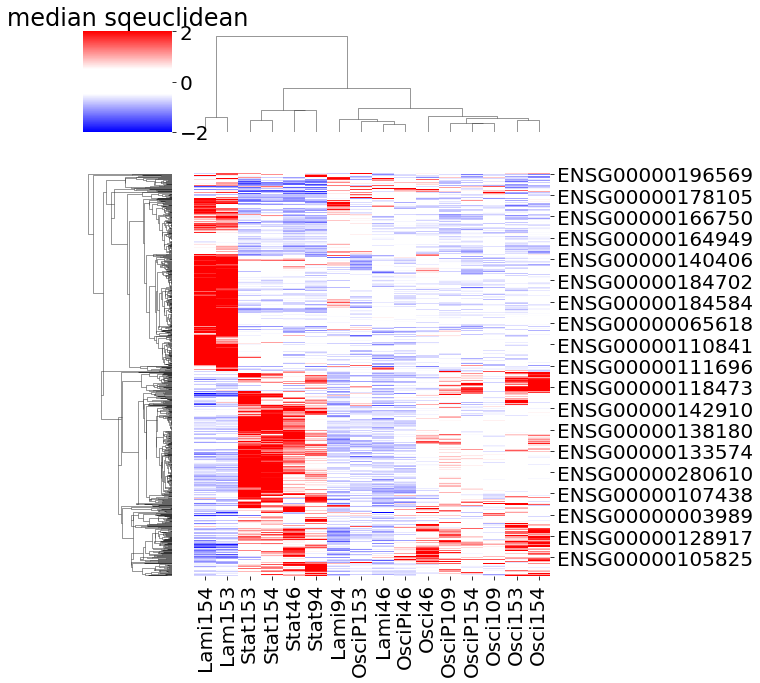

In [16]:
linkage_methods = ['complete', 'single', 'average', 'ward', 'weighted', 'centroid', 'median']
distance_metrics = ['cosine', 'euclidean', 'correlation', 'braycurtis', 'chebyshev', 'seuclidean', 'minkowski', 'sqeuclidean']

for linkage_method in linkage_methods:
    for distance_metric in distance_metrics:
        
        if linkage_method == 'single' and (distance_metric == 'chebyshev' or distance_metric == 'minkowski'):
            pass
        else:
    
            print('working with {} and {}...'.format(linkage_method, distance_metric))

            seaborn.clustermap(df2p, cmap=bwwr, method=linkage_method, metric=distance_metric, vmin=-2, vmax=2)

            matplotlib.pyplot.title('{} {}'.format(linkage_method, distance_metric))
            matplotlib.pyplot.tight_layout()
            matplotlib.pyplot.savefig('figures/{}.{}.pdf'.format(linkage_method, distance_metric))

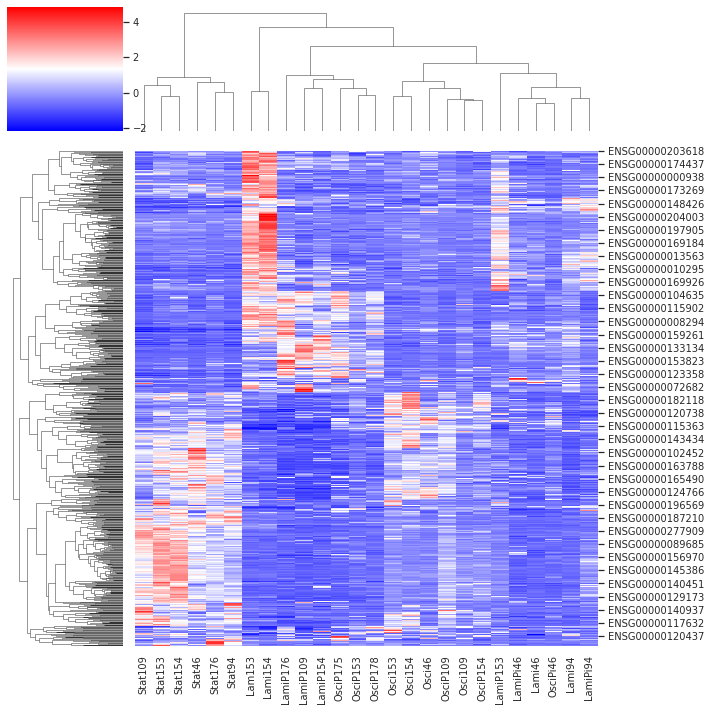

In [17]:
# generate the figure with metabolite names
linkage_method = 'complete'
distance_metric = 'euclidean'

seaborn.set(font_scale=0.9)
seaborn.clustermap(zscore_df, cmap='bwr', method=linkage_method, metric=distance_metric)

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

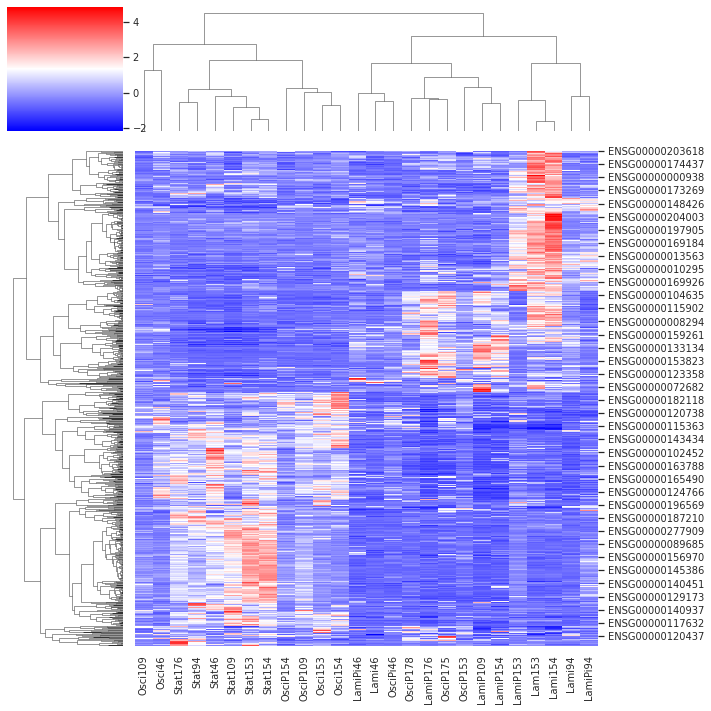

In [18]:
# generate the figure with metabolite names
linkage_method = 'complete'
distance_metric = 'cosine'

seaborn.set(font_scale=0.9)
seaborn.clustermap(zscore_df, cmap='bwr', method=linkage_method, metric=distance_metric)

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

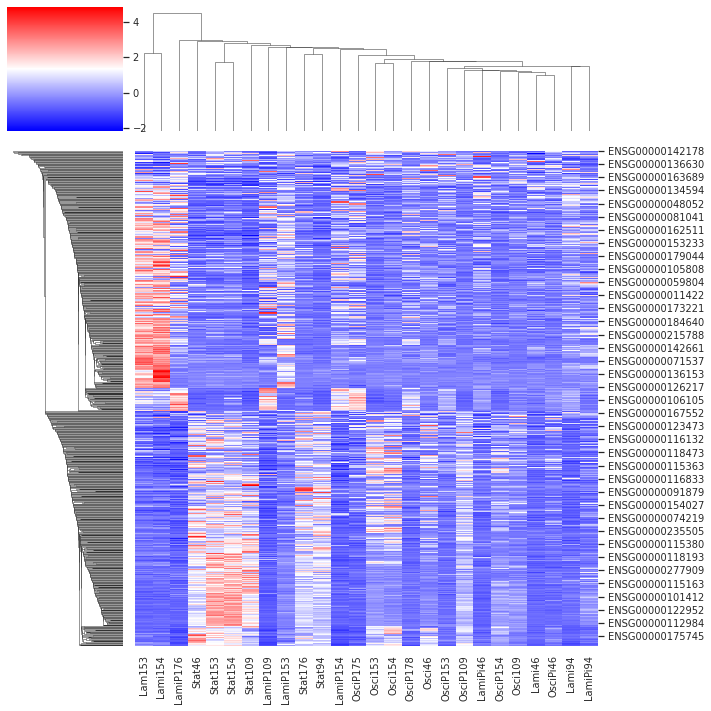

In [19]:
# generate the figure with metabolite names
linkage_method = 'single'
distance_metric = 'euclidean'

seaborn.set(font_scale=0.9)
seaborn.clustermap(zscore_df, cmap='bwr', method=linkage_method, metric=distance_metric)

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

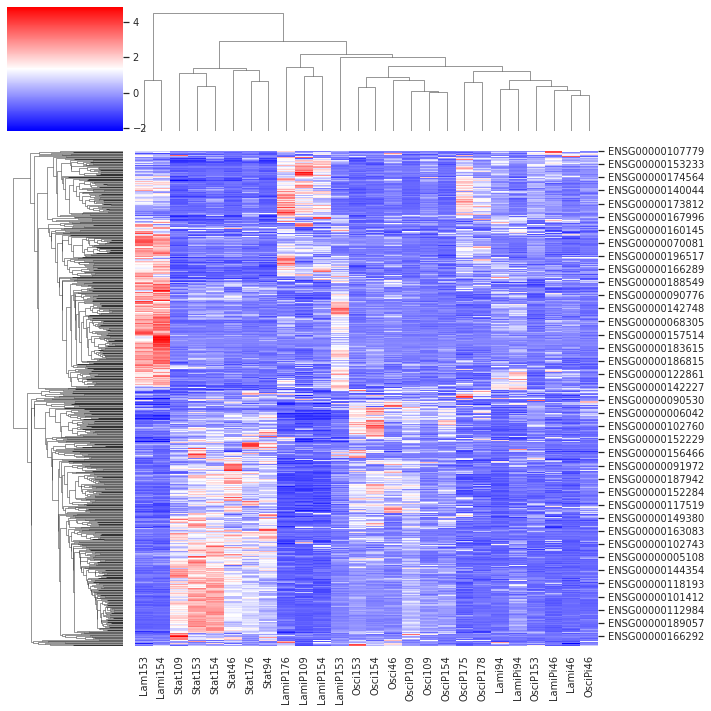

In [20]:
# generate the figure with metabolite names
linkage_method = 'average'
distance_metric = 'euclidean'

seaborn.set(font_scale=0.9)
seaborn.clustermap(zscore_df, cmap='bwr', method=linkage_method, metric=distance_metric)

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

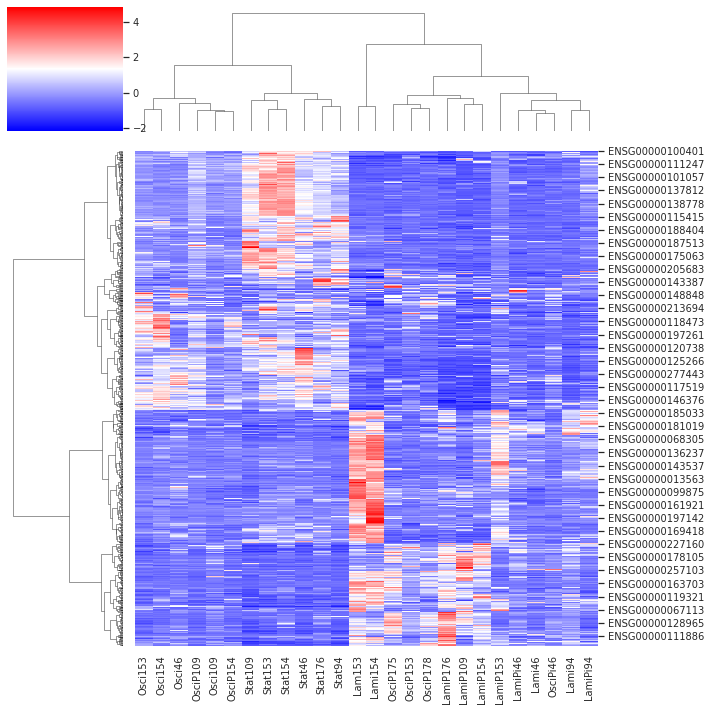

In [21]:
# generate the figure with metabolite names
linkage_method = 'ward'
distance_metric = 'euclidean'

seaborn.set(font_scale=0.9)
seaborn.clustermap(zscore_df, cmap='bwr', method=linkage_method, metric=distance_metric)

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

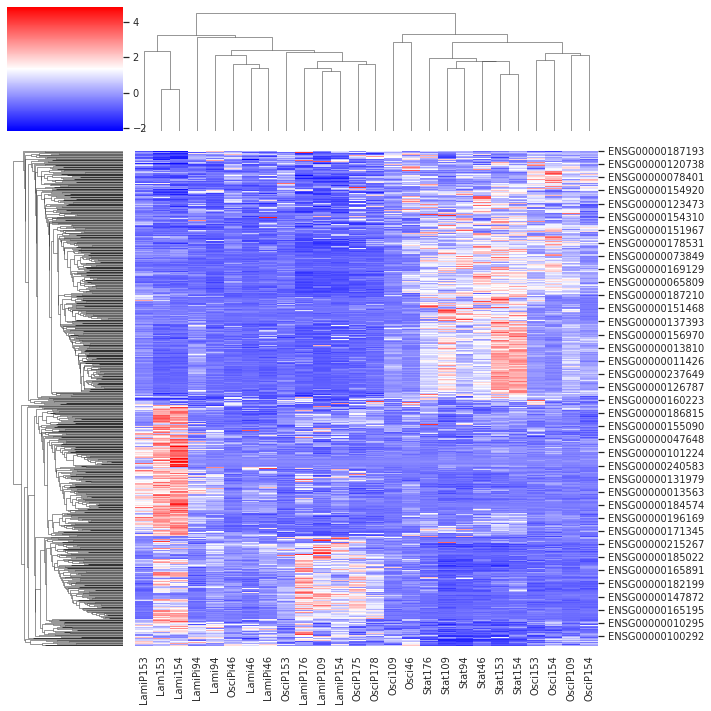

In [22]:
# generate the figure with metabolite names
linkage_method = 'average'
distance_metric = 'canberra'

seaborn.set(font_scale=0.9)
seaborn.clustermap(zscore_df, cmap='bwr', method=linkage_method, metric=distance_metric)

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()